<a href="https://colab.research.google.com/github/ZemelakGoraga/Data-Analytics-Capstone/blob/main/live_animals_import-final%20version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Topic:** "Unveiling Global Live Animal Trade Patterns: Insights from FAOSTAT's Dataset"

**Project description:**

The project, "Unveiling Global Live Animal Trade Patterns: Insights from FAOSTAT's Dataset," aims to leverage advanced data analytics techniques to address key challenges in cattle imports. With a focus on enhancing resource allocation and decision-making, this project will provide insights and recommendations to ensure efficient utilization of resources while meeting demand for cattle imports.

**Business Objective:**

To optimize cattle import strategies for different countries by analyzing historical data, identifying trends and anomalies, predicting future import quantities, and recommending prescriptive actions to maximize efficiency.


**Questions to address:**

1. Descriptive Question:
What is the trend in import quantity of cattle across different countries over the years?

2. Diagnostic Question:
Are there specific years or countries where there have been significant changes in cattle import quantity?

3. Predictive Question:
Can we predict the future import quantity of cattle for a specific country?

4. Prescriptive Question:
What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

In [1]:
# Step 1. Data Collection
# Importing datasets from Kaggle
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [2]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json


# Next
# Next, install the Kaggle API client.
!pip install -q kaggle



# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


-rw-r--r-- 1 root root 63 Aug 13 17:15 kaggle.json


In [3]:
# Next

# List a given datasets
# 'kaggle datasets download -d unitednations/global-food-agriculture-statistics' this is the specific database we want to download from kaggle. N.B it may have multiple datasets. check

!kaggle datasets download -d unitednations/global-food-agriculture-statistics


100% 442M/444M [00:04<00:00, 140MB/s]
100% 444M/444M [00:04<00:00, 106MB/s]


In [4]:
import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/global-food-agriculture-statistics.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)


current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv
current_FAO/__MACOSX/raw_files/._Emissi

In [5]:
import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv"

# Read the ZIP archive
with ZipFile("/content/global-food-agriculture-statistics.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')

# Display first 5 rows
print(df.head())


['current_FAO/__MACOSX/raw_files/._ASTI_Research_Spending_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._ASTI_Researchers_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_Crops_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._CommodityBalances_LivestockFish_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._ConsumerPriceIndices_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Deflators_E_All_Data_(Normalized).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_Savanna_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Burning_crop_residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Crop_Residues_E_All_Data_(Norm).csv', 'current_FAO/__MACOSX/raw_files/._Emissions_Agriculture_Cultivated_Organic_Soils_E_All_Data_(Norm).csv', 'curr

In [13]:
# Display last 5 rows
print(df.tail())

        Area Code                                     Area  Item Code  \
662953       5817  Net Food Importing Developing Countries       1922   
662954       5817  Net Food Importing Developing Countries       1922   
662955       5817  Net Food Importing Developing Countries       1922   
662956       5817  Net Food Importing Developing Countries       1922   
662957       5817  Net Food Importing Developing Countries       1922   

                   Item  Element Code       Element  Year Code  Year  \
662953  Sheep and Goats          5922  Export Value       2009  2009   
662954  Sheep and Goats          5922  Export Value       2010  2010   
662955  Sheep and Goats          5922  Export Value       2011  2011   
662956  Sheep and Goats          5922  Export Value       2012  2012   
662957  Sheep and Goats          5922  Export Value       2013  2013   

            Unit      Value Flag  
662953  1000 US$   456293.0    A  
662954  1000 US$   421311.0    A  
662955  1000 US$   6493

In [17]:
# Sort the data by Area', 'Item', 'Element', 'Year'])
import pandas as pd

# Assuming your dataset is named 'df'
# Sort the dataset by 'Area', 'Item', and 'Element' columns
sorted_df = df.sort_values(by=['Area', 'Item', 'Element', 'Year'])

# Display the sorted DataFrame
print(sorted_df['Area', 'Item', 'Element', 'Unit', 'Year'])


        Area Code         Area  Item Code                     Item  \
583             2  Afghanistan       1882  Agricult.Products,Total   
584             2  Afghanistan       1882  Agricult.Products,Total   
585             2  Afghanistan       1882  Agricult.Products,Total   
586             2  Afghanistan       1882  Agricult.Products,Total   
587             2  Afghanistan       1882  Agricult.Products,Total   
...           ...          ...        ...                      ...   
514772        181     Zimbabwe       1079                  Turkeys   
514773        181     Zimbabwe       1079                  Turkeys   
514774        181     Zimbabwe       1079                  Turkeys   
514775        181     Zimbabwe       1079                  Turkeys   
514776        181     Zimbabwe       1079                  Turkeys   

        Element Code       Element  Year Code  Year      Unit    Value Flag  
583             5922  Export Value       1961  1961  1000 US$  37421.0    A  
584

In [28]:
# Display only 'Area', 'Item', 'Element', 'Year', 'Unit', 'Value' columns
# Save this dataset as df_import_quantity

import pandas as pd

# Assuming your sorted dataset is named 'df_sorted'
selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_import_quantity = sorted_df[sorted_df['Element'] == 'Import Quantity'][selected_columns]

print("Selected Data:")
print(df_import_quantity)

# Save as df_import_quantity.csv
df_import_quantity.to_csv('df_import_quantity.csv', index=False)


Selected Data:
               Area             Item          Element  Year  Unit  Value
636     Afghanistan  Bovine, Animals  Import Quantity  1961  Head    NaN
637     Afghanistan  Bovine, Animals  Import Quantity  1962  Head    NaN
638     Afghanistan  Bovine, Animals  Import Quantity  1963  Head    NaN
639     Afghanistan  Bovine, Animals  Import Quantity  1964  Head    NaN
640     Afghanistan  Bovine, Animals  Import Quantity  1965  Head    NaN
...             ...              ...              ...   ...   ...    ...
515461     Zimbabwe  Sheep and Goats  Import Quantity  2009  Head   91.0
515462     Zimbabwe  Sheep and Goats  Import Quantity  2010  Head   31.0
515463     Zimbabwe  Sheep and Goats  Import Quantity  2011  Head    3.0
515464     Zimbabwe  Sheep and Goats  Import Quantity  2012  Head  344.0
515465     Zimbabwe  Sheep and Goats  Import Quantity  2013  Head  235.0

[147865 rows x 6 columns]


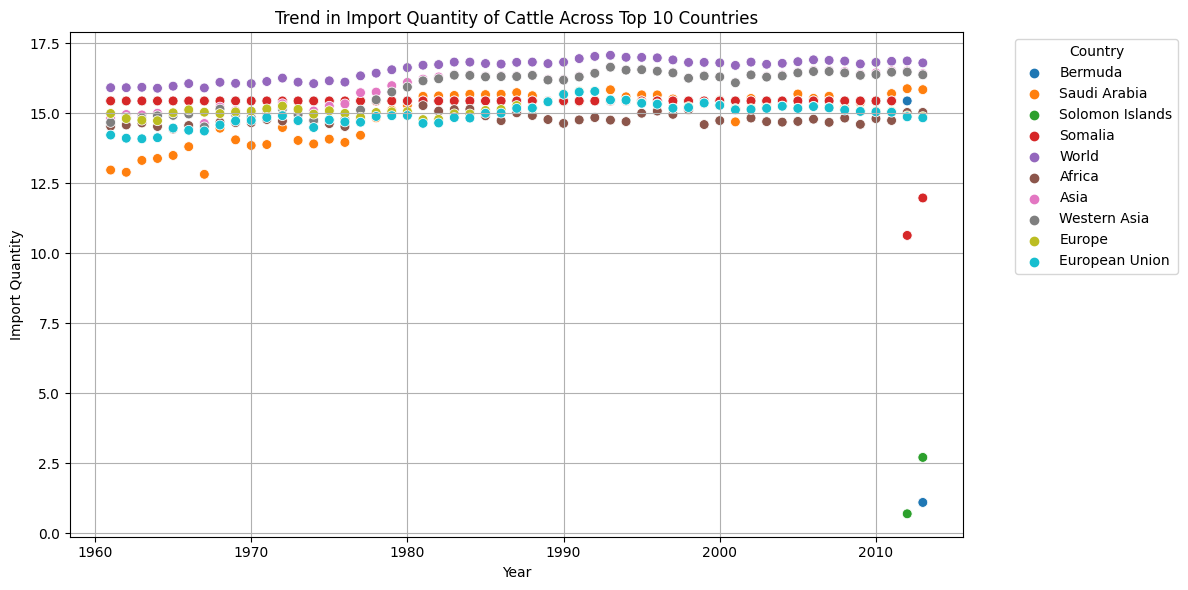

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the dataset for 'Cattle' and 'Import Quantity'
cattle_import = df[(df['Item'] == 'Sheep and Goats') & (df['Element'] == 'Import Quantity')]

# Get the top 10 countries based on import quantity of cattle
top_countries = cattle_import.groupby('Area')['Value'].sum().nlargest(10).index

# Filter the dataset for the top 10 countries
top_countries_import = cattle_import[cattle_import['Area'].isin(top_countries)]

# Create a scatter plot to show the trend in import quantity of cattle across the top 10 countries over the years
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries_import, x='Year', y='Value', hue='Area', s=50)
plt.title("Trend in Import Quantity of Cattle Across Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
code to make a scatter plot and observe specific years or countries where there have been significant changes in Cattle import quantity. Do this by condidering the top 10 countries

<ipython-input-102-90014f4e4ec7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cattle_import['Percentage_Change'] = cattle_import.groupby('Area')['Value'].pct_change() * 100


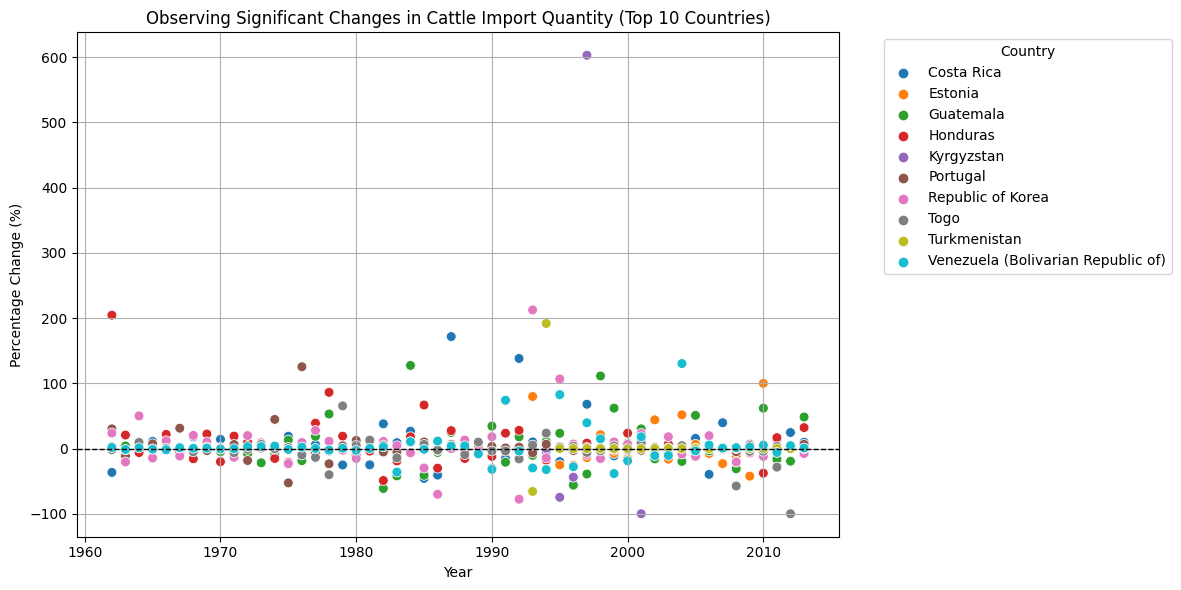

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the dataset for 'Cattle' and 'Import Quantity'
cattle_import = df[(df['Item'] == 'Cattle') & (df['Element'] == 'Import Quantity')]

# Calculate the percentage change in import quantity for each year and country
cattle_import['Percentage_Change'] = cattle_import.groupby('Area')['Value'].pct_change() * 100

# Get the top 10 countries by average percentage change
top_countries = cattle_import.groupby('Area')['Percentage_Change'].mean().nlargest(10).index

# Filter the data for top 10 countries
top_countries_data = cattle_import[cattle_import['Area'].isin(top_countries)]

# Create a scatter plot to observe significant changes in cattle import quantity for top 10 countries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries_data, x='Year', y='Percentage_Change', hue='Area', s=50)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero line
plt.title("Observing Significant Changes in Cattle Import Quantity (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-104-132e9d3c6465>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cattle_import['Percentage_Change'] = cattle_import.groupby('Area')['Value'].pct_change() * 100


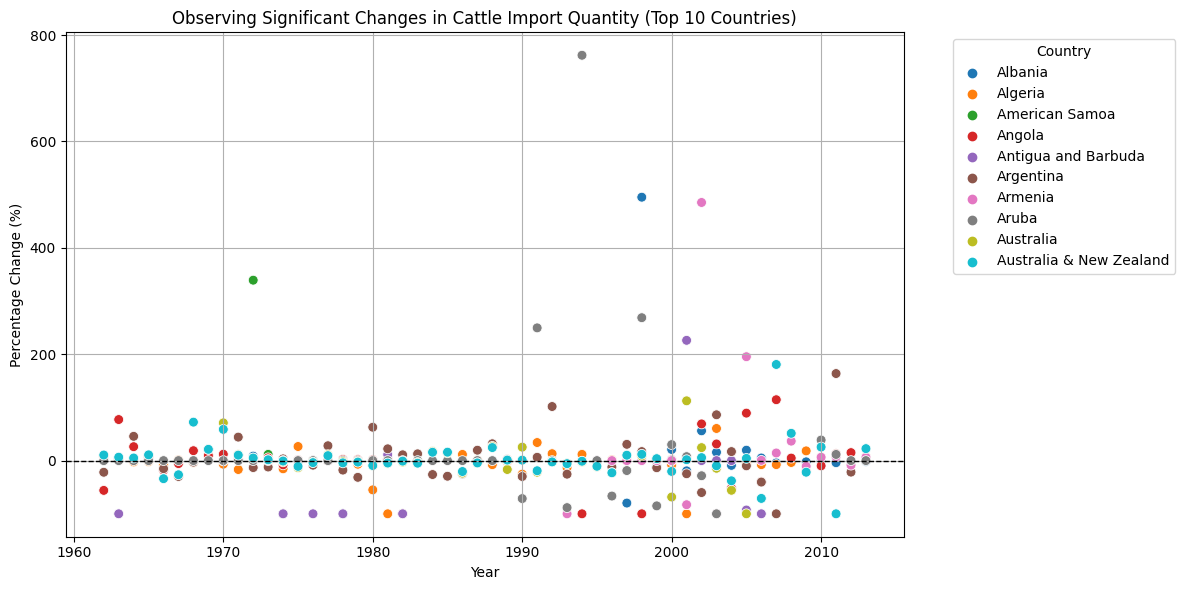

In [104]:
# Q2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the dataset for 'Cattle' and 'Import Quantity'
cattle_import = df[(df['Item'] == 'Cattle') & (df['Element'] == 'Import Quantity')]

# Calculate the percentage change in import quantity for each year and country
cattle_import['Percentage_Change'] = cattle_import.groupby('Area')['Value'].pct_change() * 100

# Get the top 10 countries by maximum absolute percentage change
top_countries = cattle_import.groupby('Area')['Percentage_Change'].apply(lambda x: x.abs().max()).nlargest(10).index

# Filter the data for top 10 countries
top_countries_data = cattle_import[cattle_import['Area'].isin(top_countries)]

# Create a scatter plot to observe significant changes in cattle import quantity for top 10 countries
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries_data, x='Year', y='Percentage_Change', hue='Area', s=50)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero line
plt.title("Observing Significant Changes in Cattle Import Quantity (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Percentage Change (%)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
# Show unique values of Area, Item, Element, Flag, and Year in df dataset

import pandas as pd

# Assuming your dataset is named 'df'
unique_areas = df['Area'].unique()
unique_items = df['Item'].unique()
unique_elements = df['Element'].unique()
unique_flags = df['Flag'].unique()
unique_years = df['Year'].unique()
unique_units = df['Unit'].unique()

print("Unique Areas:", unique_areas)
print("Unique Items:", unique_items)
print("Unique Elements:", unique_elements)
print("Unique Flags:", unique_flags)
print("Unique years:", unique_years)
print("Unique units:", unique_units)

Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [31]:
# describe the 'df_import_quantity' dataset sorted by 'Item' and ' Element'

import pandas as pd

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Sort the dataset by 'Item' and 'Element'
sorted_df = df_import_quantity.sort_values(by=['Item', 'Element'])

# Get unique combinations of 'Item' and 'Element'
unique_combinations = sorted_df[['Item', 'Element']].drop_duplicates()

# Iterate through unique combinations and describe the corresponding subset
for index, row in unique_combinations.iterrows():
    item_value = row['Item']
    element_value = row['Element']

    subset_df = sorted_df[(sorted_df['Item'] == item_value) & (sorted_df['Element'] == element_value)]

    print(f"Summary for Item: {item_value}, Element: {element_value}")
    print(subset_df.describe())
    print("\n")


Summary for Item: Animals live nes, Element: Import Quantity
              Year        Value
count  7924.000000  4670.000000
mean   1988.045936     1.590792
std      15.343742    37.218258
min    1961.000000     0.000000
25%    1975.000000     0.000000
50%    1989.000000     0.000000
75%    2001.000000     0.000000
max    2013.000000  1239.000000


Summary for Item: Asses, Element: Import Quantity
              Year         Value
count  6550.000000   5078.000000
mean   1987.636489    600.767625
std      15.310187   2145.532238
min    1961.000000      0.000000
25%    1974.000000      0.000000
50%    1988.000000      0.000000
75%    2001.000000     84.000000
max    2013.000000  38605.000000


Summary for Item: Beehives, Element: Import Quantity
              Year         Value
count  4772.000000   1282.000000
mean   1988.075231    374.009360
std      15.407359   3013.817187
min    1961.000000      0.000000
25%    1975.000000      0.000000
50%    1989.000000      0.000000
75%    2002.0000

import pandas as pd

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Calculate the mean of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df_import_quantity.groupby(['Element', 'Item'])['Value'].mean().reset_index()

print(mean_by_element)


In [80]:
import pandas as pd

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Calculate the mean of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df_import_quantity.groupby(['Element', 'Item'])['Value'].mean().reset_index()

print(mean_by_element)


            Element                  Item          Value
0   Import Quantity      Animals live nes       1.590792
1   Import Quantity                 Asses     600.767625
2   Import Quantity              Beehives     374.009360
3   Import Quantity       Bovine, Animals  184431.415900
4   Import Quantity             Buffaloes    7471.603367
5   Import Quantity       Camelids, other     103.763158
6   Import Quantity                Camels   15928.314613
7   Import Quantity                Cattle  182962.922503
8   Import Quantity              Chickens   11405.783392
9   Import Quantity                 Ducks     678.130108
10  Import Quantity                 Goats   81094.206200
11  Import Quantity                Horses   11103.282027
12  Import Quantity                 Mules     535.218351
13  Import Quantity  Pigeons, other birds     286.159215
14  Import Quantity                  Pigs  365636.515537
15  Import Quantity     Rabbits and hares     383.095342
16  Import Quantity        Rode

In [83]:
import pandas as pd



# Calculate the mean of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df.groupby(['Element', 'Item'])['Value'].mean().reset_index()

print(mean_by_element)


            Element                     Item      Value
0   Export Quantity         Animals live nes   6.782880
1   Export Quantity                    Asses   5.321731
2   Export Quantity                 Beehives  11.682548
3   Export Quantity          Bovine, Animals   7.162161
4   Export Quantity                Buffaloes   8.356471
..              ...                      ...        ...
85     Import Value           Rodents, other  12.488728
86     Import Value                    Sheep   5.606590
87     Import Value          Sheep and Goats   5.652104
88     Import Value  Total Merchandise Trade  14.603769
89     Import Value                  Turkeys   9.109901

[90 rows x 3 columns]


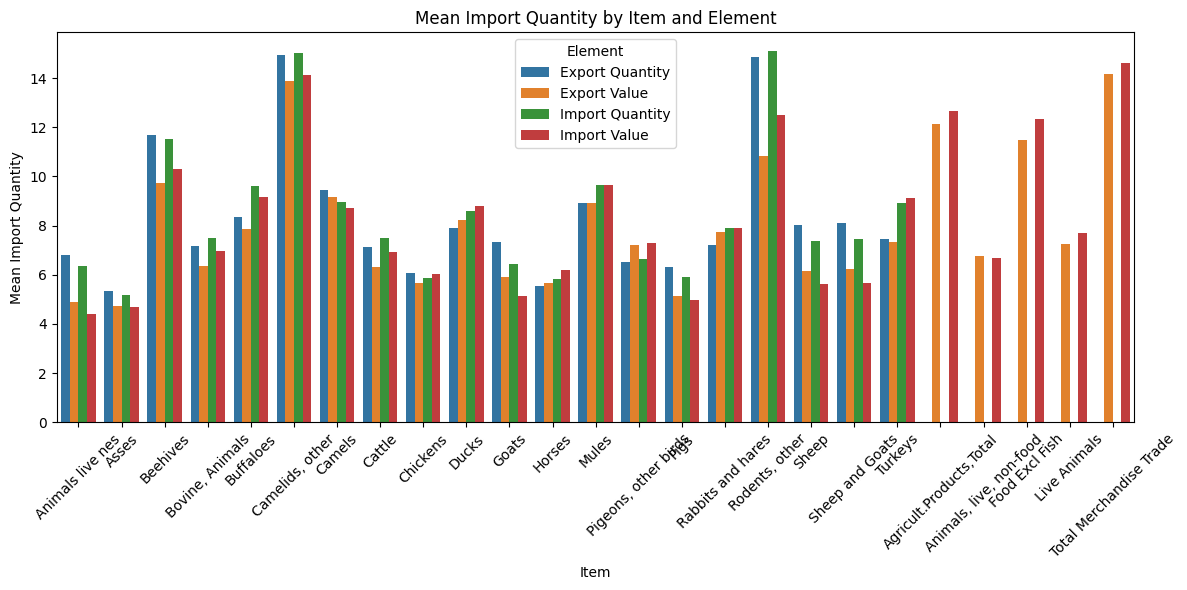

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df.groupby(['Element', 'Item'])['Value'].mean().reset_index()

# Create a bar plot to visualize the mean values
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_by_element, x='Item', y='Value', hue='Element')
plt.title("Mean Import Quantity by Item and Element")
plt.xlabel("Item")
plt.ylabel("Mean Import Quantity")
plt.xticks(rotation=45)
plt.legend(title='Element')
plt.tight_layout()
plt.show()


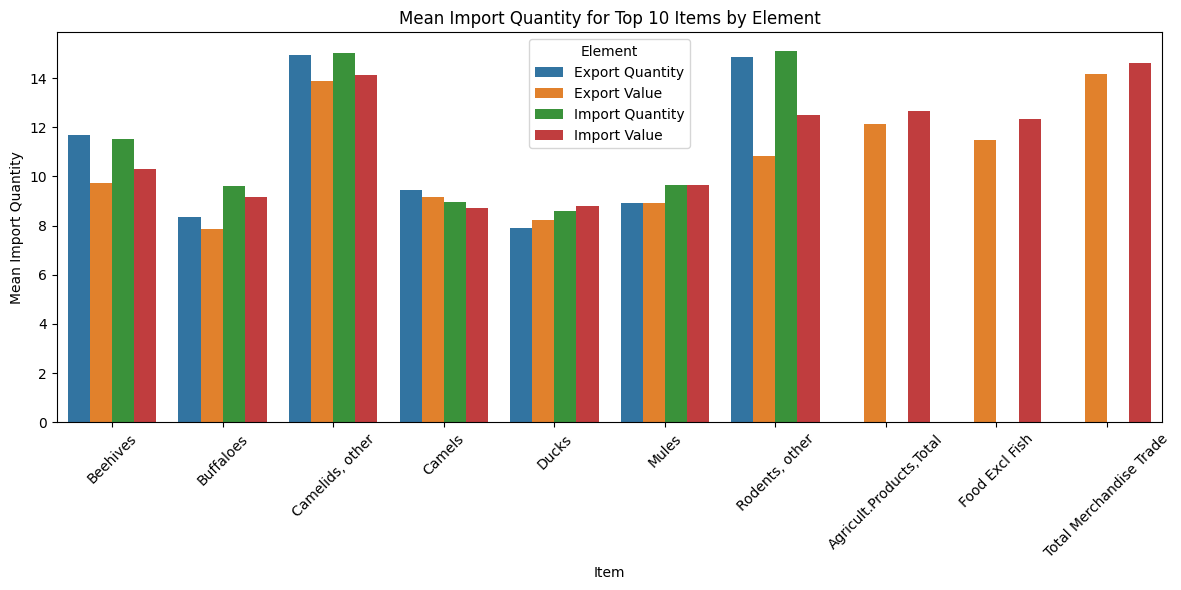

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the mean of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df.groupby(['Element', 'Item'])['Value'].mean().reset_index()

# Get the top 10 Items by mean import quantity
top_10_items = mean_by_element.groupby('Item')['Value'].mean().sort_values(ascending=False).head(10).index
top_10_mean_by_element = mean_by_element[mean_by_element['Item'].isin(top_10_items)]

# Create a bar plot to visualize the mean values for the top 10 Items
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_mean_by_element, x='Item', y='Value', hue='Element')
plt.title("Mean Import Quantity for Top 10 Items by Element")
plt.xlabel("Item")
plt.ylabel("Mean Import Quantity")
plt.xticks(rotation=45)
plt.legend(title='Element')
plt.tight_layout()
plt.show()


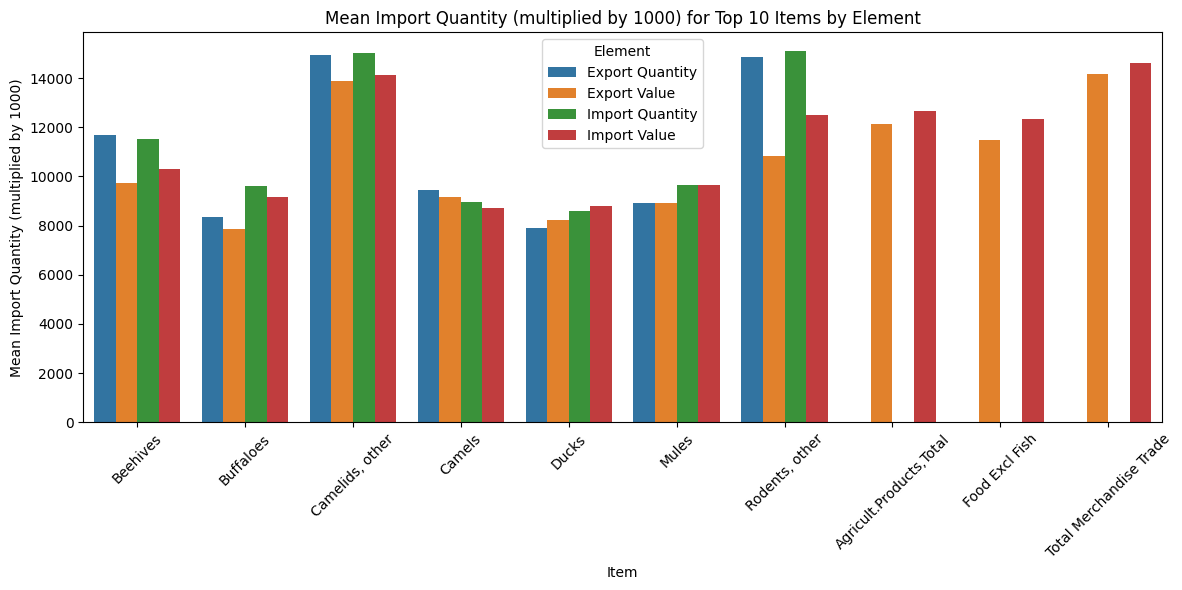

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the mean (multiplied by 1000) of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df.groupby(['Element', 'Item'])['Value'].mean().reset_index()
mean_by_element['Mean_1000'] = mean_by_element['Value'] * 1000

# Get the top 10 Items by mean import quantity
top_10_items = mean_by_element.groupby('Item')['Mean_1000'].mean().sort_values(ascending=False).head(10).index
top_10_mean_by_element = mean_by_element[mean_by_element['Item'].isin(top_10_items)]

# Create a grouped bar plot to visualize the mean (multiplied by 1000) values for the top 10 Items
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_mean_by_element, x='Item', y='Mean_1000', hue='Element')
plt.title("Mean Import Quantity (multiplied by 1000) for Top 10 Items by Element")
plt.xlabel("Item")
plt.ylabel("Mean Import Quantity (multiplied by 1000)")
plt.xticks(rotation=45)
plt.legend(title='Element')
plt.tight_layout()
plt.show()


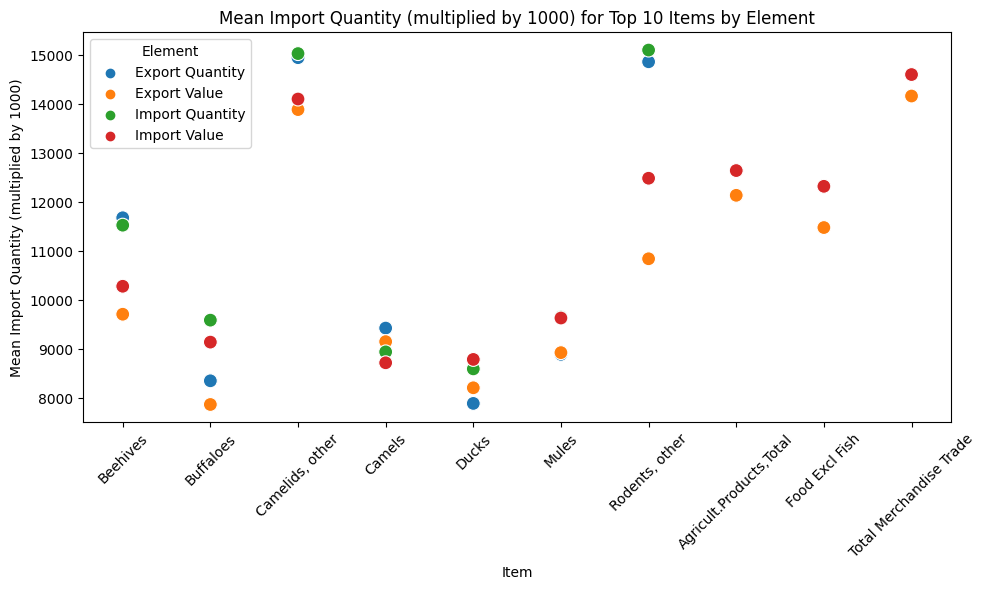

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the mean (multiplied by 1000) of each 'Item' sorted by unique values in the 'Element'
mean_by_element = df.groupby(['Element', 'Item'])['Value'].mean().reset_index()
mean_by_element['Mean_1000'] = mean_by_element['Value'] * 1000

# Get the top 10 Items by mean import quantity
top_10_items = mean_by_element.groupby('Item')['Mean_1000'].mean().sort_values(ascending=False).head(10).index
top_10_mean_by_element = mean_by_element[mean_by_element['Item'].isin(top_10_items)]

# Create a scatter plot to visualize the mean (multiplied by 1000) values for the top 10 Items
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10_mean_by_element, x='Item', y='Mean_1000', hue='Element', s=100)
plt.title("Mean Import Quantity (multiplied by 1000) for Top 10 Items by Element")
plt.xlabel("Item")
plt.ylabel("Mean Import Quantity (multiplied by 1000)")
plt.xticks(rotation=45)
plt.legend(title='Element')
plt.tight_layout()
plt.show()


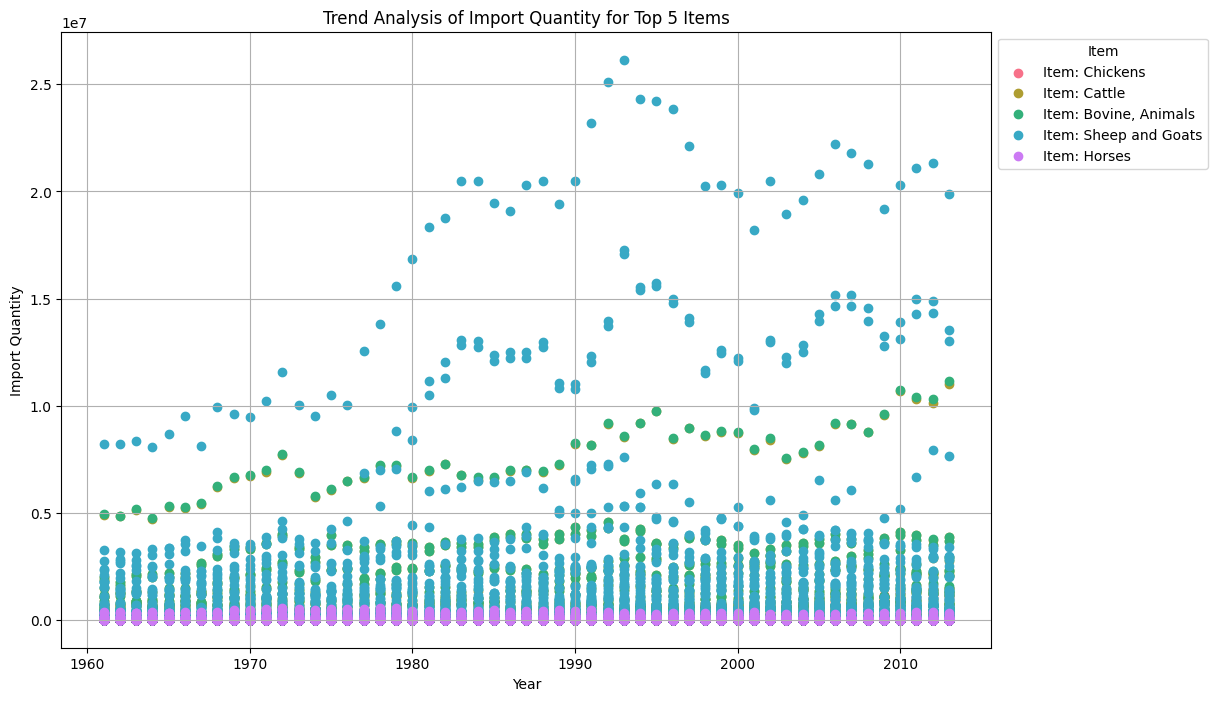

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Select the top 5 items
top_items = df_import_quantity['Item'].value_counts().head(5).index

# Filter the dataset for top items
top_data = df_import_quantity[df_import_quantity['Item'].isin(top_items)]

# Create a scatter plot for each item in the top 5 items
plt.figure(figsize=(12, 8))
sns.set_palette("husl", n_colors=len(top_items))

for item in top_items:
    item_data = top_data[top_data['Item'] == item]
    plt.scatter(item_data['Year'], item_data['Value'], label=f"Item: {item}")

plt.title("Trend Analysis of Import Quantity for Top 5 Items")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


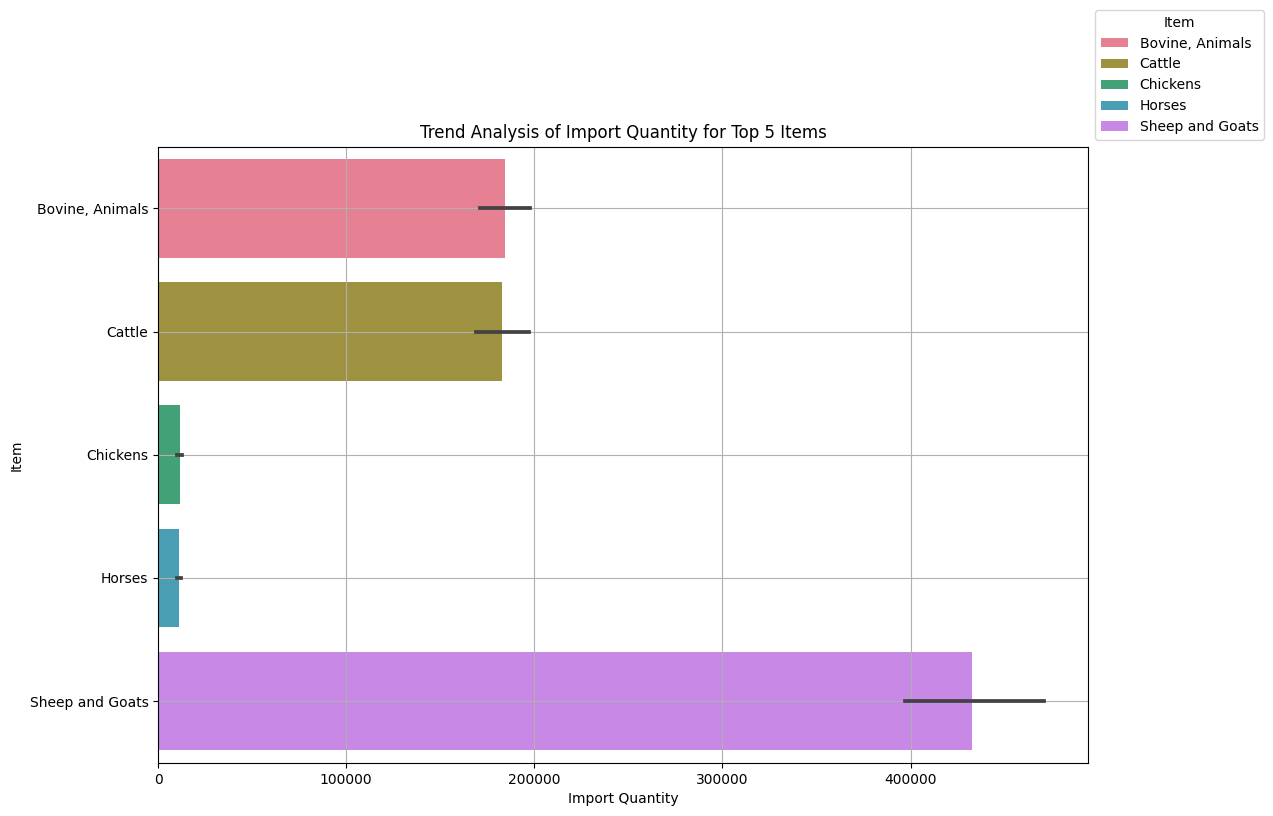

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Select the top 5 items
top_items = df_import_quantity['Item'].value_counts().head(5).index

# Filter the dataset for top items
top_data = df_import_quantity[df_import_quantity['Item'].isin(top_items)]

# Create a horizontal bar chart for each item in the top 5 items
plt.figure(figsize=(12, 8))
sns.set_palette("husl", n_colors=len(top_items))

sns.barplot(data=top_data, y='Item', x='Value', hue='Item', dodge=False)

plt.title("Trend Analysis of Import Quantity for Top 5 Items")
plt.xlabel("Import Quantity")
plt.ylabel("Item")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


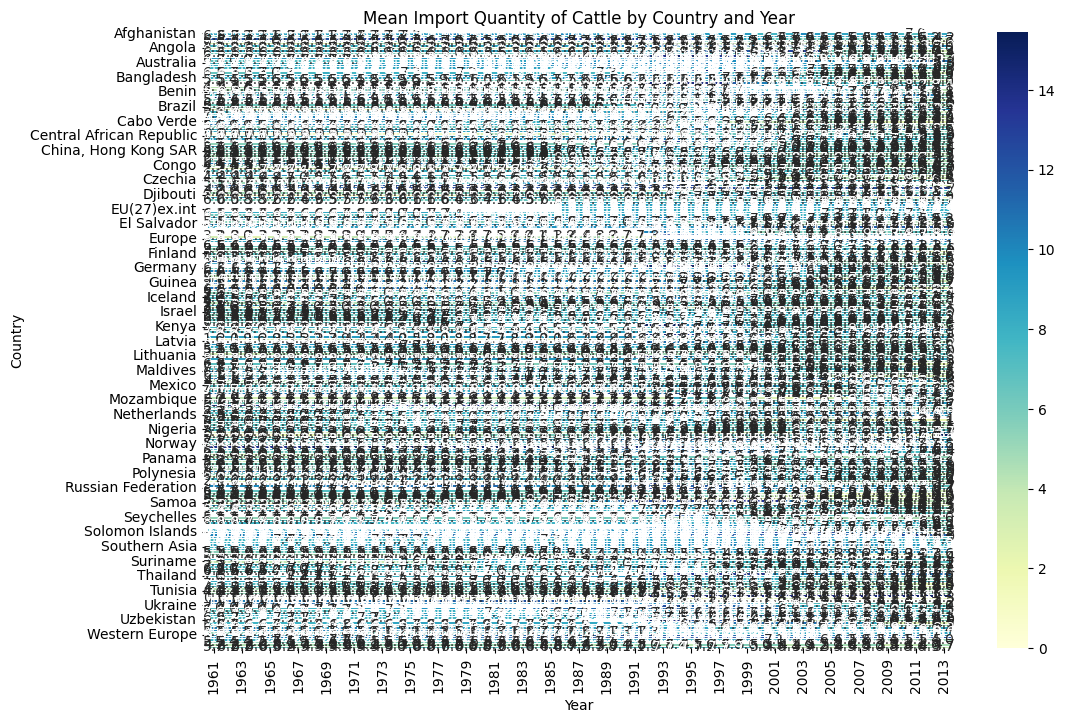

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant columns for analysis
relevant_columns = ['Area', 'Year', 'Value']  # Modify as needed
data = df[relevant_columns]

# Group data by 'Area' and 'Year' and calculate the mean import quantity
grouped_data = data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot_table(index='Area', columns='Year', values='Value')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mean Import Quantity of Cattle by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


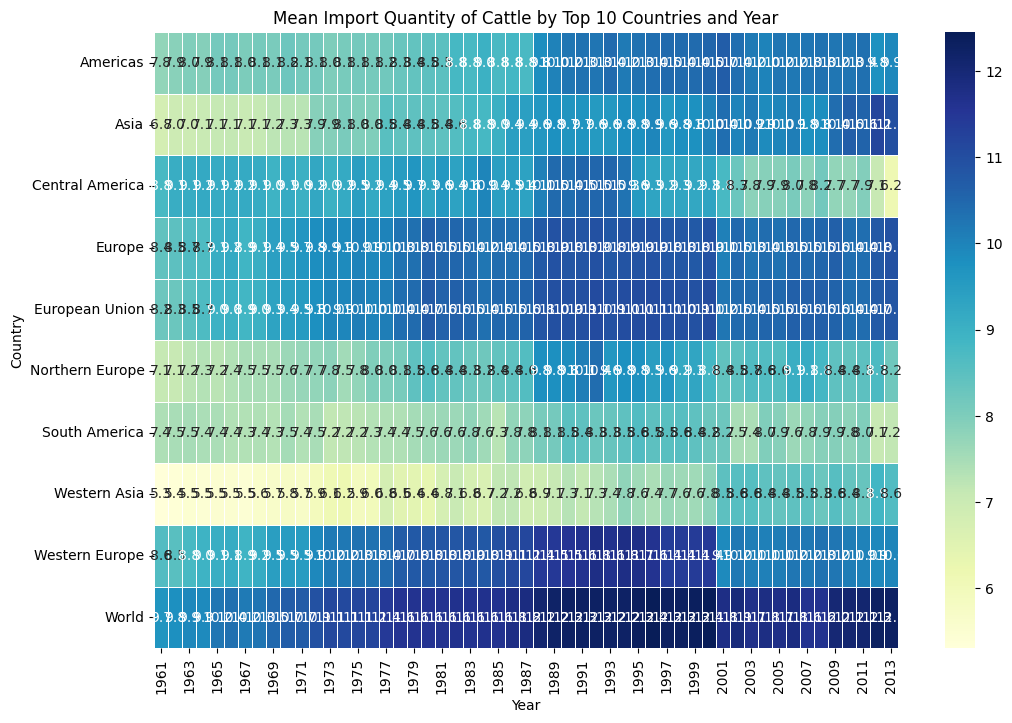

In [113]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant columns for analysis
relevant_columns = ['Area', 'Year', 'Value']  # Modify as needed
data = df[relevant_columns]

# Get the top 10 countries
top_countries = data['Area'].value_counts().head(10).index

# Filter data for the top 10 countries
top_data = data[data['Area'].isin(top_countries)]

# Group data by 'Area' and 'Year' and calculate the mean import quantity
grouped_data = top_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot_table(index='Area', columns='Year', values='Value')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mean Import Quantity of Cattle by Top 10 Countries and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


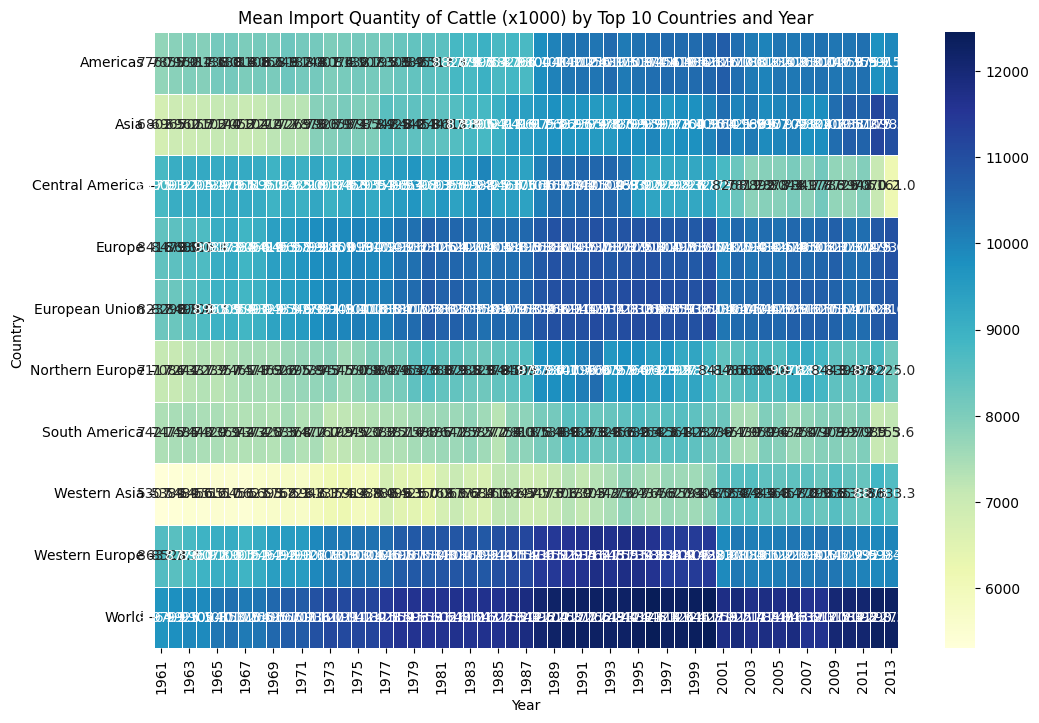

In [115]:
#
 pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for analysis
relevant_columns = ['Area', 'Year', 'Value']  # Modify as needed
data = df[relevant_columns]

# Get the top 10 countries
top_countries = data['Area'].value_counts().head(10).index

# Filter data for the top 10 countries
top_data = data[data['Area'].isin(top_countries)]

# Group data by 'Area' and 'Year' and calculate the mean import quantity
grouped_data = top_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot_table(index='Area', columns='Year', values='Value')

# Multiply the values by 1000
heatmap_data *= 1000

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mean Import Quantity of Cattle (x1000) by Top 10 Countries and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


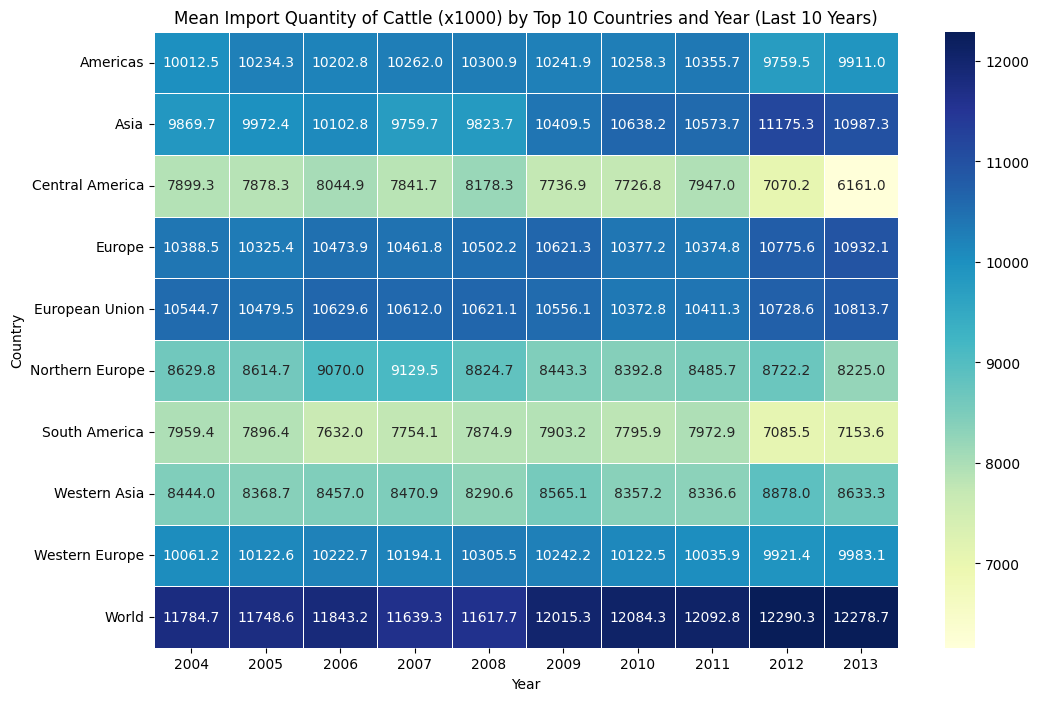

In [116]:
# Q1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for analysis
relevant_columns = ['Area', 'Year', 'Value']  # Modify as needed
data = df[relevant_columns]

# Get the top 10 countries
top_countries = data['Area'].value_counts().head(10).index

# Filter data for the top 10 countries and last 10 years
top_data = data[data['Area'].isin(top_countries) & (data['Year'] >= data['Year'].max() - 9)]

# Group data by 'Area' and 'Year' and calculate the mean import quantity
grouped_data = top_data.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Pivot the data to create a heatmap
heatmap_data = grouped_data.pivot_table(index='Area', columns='Year', values='Value')

# Multiply the values by 1000
heatmap_data *= 1000

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Mean Import Quantity of Cattle (x1000) by Top 10 Countries and Year (Last 10 Years)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.show()


In [77]:
# Display only 'Area', 'Item', 'Element', 'Year', 'Unit', 'Value' columns
# Save this dataset as df_import_value

import pandas as pd

# Assuming your sorted dataset is named 'df_sorted'
selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_import_value = sorted_df[sorted_df['Element'] == 'Import Value'][selected_columns]

print("Selected Data:")
print(df_import_value)

# Save as df_import_quantity.csv
df_import_value.to_csv('df_import_value.csv', index=False)

Selected Data:
                             Area             Item       Element  Year  \
71207                    Bulgaria  Bovine, Animals  Import Value  1990   
642226  Least Developed Countries        Buffaloes  Import Value  1996   
5145                      Algeria         Chickens  Import Value  1965   
642225  Least Developed Countries        Buffaloes  Import Value  1995   
642229  Least Developed Countries        Buffaloes  Import Value  1999   
...                           ...              ...           ...   ...   
428631                      Spain  Bovine, Animals  Import Value  1981   
428630                      Spain  Bovine, Animals  Import Value  1980   
428629                      Spain  Bovine, Animals  Import Value  1979   
428635                      Spain  Bovine, Animals  Import Value  1985   
452458                   Thailand            Asses  Import Value  1994   

            Unit      Value  
71207   1000 US$   8.375399  
642226  1000 US$   0.000000  
5145  

In [78]:
# describe the 'df_import_value' dataset sorted by 'Item' and ' Element'

import pandas as pd

# Load df_import_value from CSV (if not already loaded)
df_import_value = pd.read_csv('df_import_value.csv')

# Sort the dataset by 'Item' and 'Element'
sorted_df = df_import_value.sort_values(by=['Item', 'Element'])

# Get unique combinations of 'Item' and 'Element'
unique_combinations = sorted_df[['Item', 'Element']].drop_duplicates()

# Iterate through unique combinations and describe the corresponding subset
for index, row in unique_combinations.iterrows():
    item_value = row['Item']
    element_value = row['Element']

    subset_df = sorted_df[(sorted_df['Item'] == item_value) & (sorted_df['Element'] == element_value)]

    print(f"Summary for Item: {item_value}, Element: {element_value}")
    print(subset_df.describe())
    print("\n")

Summary for Item: Agricult.Products,Total, Element: Import Value
               Year         Value
count  12044.000000  12044.000000
mean    1987.741780     12.645130
std       15.341161      2.975178
min     1961.000000      0.000000
25%     1974.000000     10.868497
50%     1988.000000     12.596081
75%     2001.000000     14.554118
max     2013.000000     21.080484


Summary for Item: Animals live nes, Element: Import Value
              Year        Value
count  9948.000000  9948.000000
mean   1987.765078     4.396804
std      15.336191     5.343487
min    1961.000000     0.000000
25%    1974.000000     0.000000
50%    1988.000000     2.484907
75%    2001.000000     6.813719
max    2013.000000    15.447088


Summary for Item: Animals, live, non-food, Element: Import Value
              Year        Value
count  9308.000000  9308.000000
mean   1987.925226     6.693999
std      15.356660     6.426847
min    1961.000000     0.000000
25%    1975.000000     0.000000
50%    1989.000000    

In [ ]:
# Display only 'Area', 'Item', 'Element', 'Year', 'Unit', 'Value' columns
# Save this dataset as df_import_value

import pandas as pd

# Assuming your sorted dataset is named 'df_sorted'
selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_import_value = sorted_df[sorted_df['Element'] == 'Import Quantity'][selected_columns]

print("Selected Data:")
print(df_import_quantity)

# Save as df_import_quantity.csv
df_import_quantity.to_csv('df_import_quantity.csv', index=False)


In [55]:
import pandas as pd



# Group the data by 'Element' and calculate summary statistics
element_summary = sorted_df.groupby('Element')['Value'].describe()

# Print the summary results for each unique 'Element'
for element, summary in element_summary.iterrows():
    print(f"Element: {element}")
    print(summary)
    print("=" * 40)


Element: Export Quantity
count    9.540200e+04
mean     1.872670e+05
std      1.046751e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.200000e+01
75%      8.490000e+03
max      3.857734e+07
Name: Export Quantity, dtype: float64
Element: Export Value
count    1.517150e+05
mean     8.685199e+06
std      1.714210e+08
min      0.000000e+00
25%      0.000000e+00
50%      4.650000e+02
75%      4.243850e+04
max      1.881876e+10
Name: Export Value, dtype: float64
Element: Import Quantity
count    1.108200e+05
mean     1.452689e+05
std      9.764733e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.400000e+01
75%      4.417250e+03
max      3.720142e+07
Name: Import Quantity, dtype: float64
Element: Import Value
count    1.698310e+05
mean     7.927140e+06
std      1.634374e+08
min      0.000000e+00
25%      0.000000e+00
50%      4.300000e+02
75%      3.375650e+04
max      1.878275e+10
Name: Import Value, dtype: float64


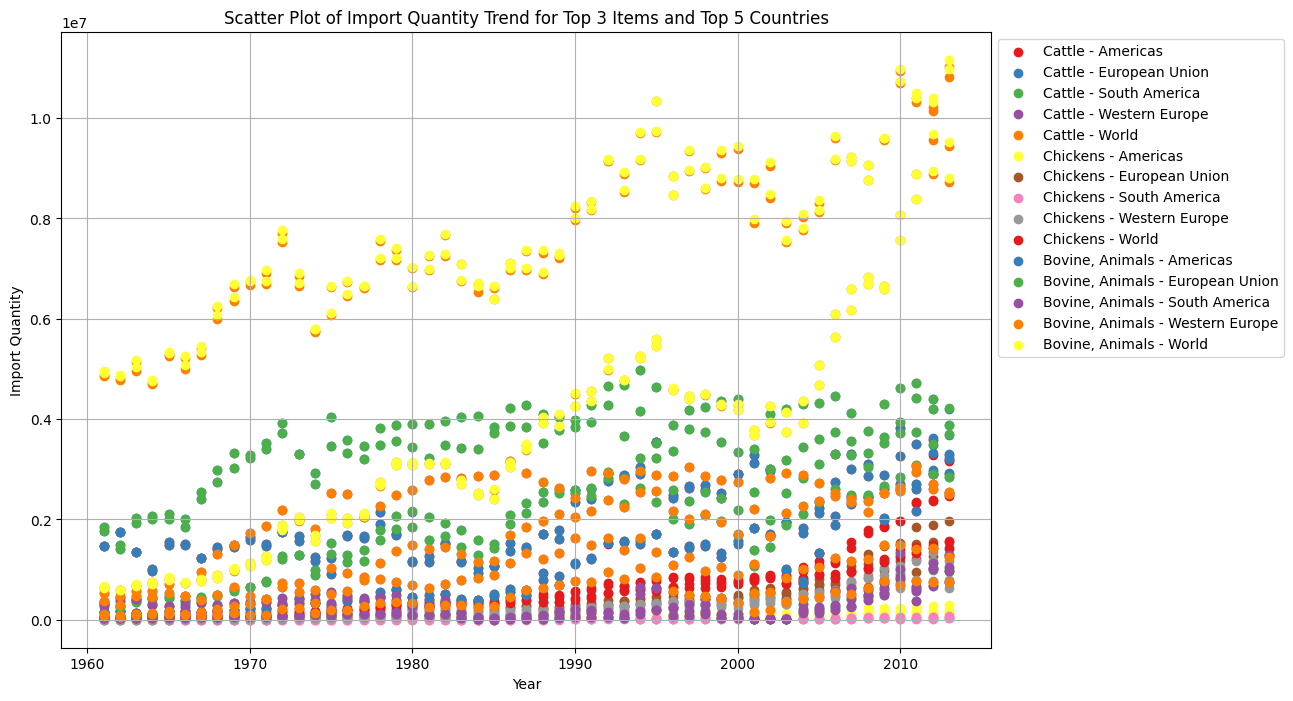

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select the top 5 countries and top 3 items
top_countries = sorted_df['Area'].value_counts().head(5).index
top_items = sorted_df['Item'].value_counts().head(3).index

# Filter the dataset for top countries and top items
top_data = sorted_df[(sorted_df['Area'].isin(top_countries)) &
                     (sorted_df['Item'].isin(top_items))]

# Create a scatter plot for each item and country
plt.figure(figsize=(12, 8))
sns.set_palette("Set1")

for item in top_data['Item'].unique():
    for country in top_data['Area'].unique():
        item_country_data = top_data[(top_data['Item'] == item) & (top_data['Area'] == country)]
        plt.scatter(item_country_data['Year'], item_country_data['Value'], label=f"{item} - {country}")

plt.title("Scatter Plot of Import Quantity Trend for Top 3 Items and Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [59]:
import pandas as pd


# Group the data by 'Item' and calculate summary statistics
summary_by_item = sorted_df.groupby('Item')['Value'].describe()

# Print the summary statistics
print(summary_by_item)


                           count          mean           std  min        25%  \
Item                                                                           
Agricult.Products,Total  23978.0  8.569033e+06  4.505438e+07  0.0   37242.75   
Animals live nes         24778.0  8.234251e+02  4.939825e+03  0.0       0.00   
Animals, live, non-food  12885.0  9.010292e+03  4.084524e+04  0.0       0.00   
Asses                    19039.0  6.496737e+02  4.676979e+03  0.0       0.00   
Beehives                  5798.0  5.636706e+02  2.947949e+03  0.0       0.00   
Bovine, Animals          39871.0  1.482486e+05  6.153788e+05  0.0       1.00   
Buffaloes                 8002.0  4.094372e+03  1.246523e+04  0.0       0.00   
Camelids, other            291.0  7.794845e+01  1.843851e+02  0.0       0.00   
Camels                    7156.0  1.143110e+04  3.061229e+04  0.0       0.00   
Cattle                   40083.0  1.471296e+05  6.117279e+05  0.0       1.00   
Chickens                 38974.0  1.6580

In [61]:
import pandas as pd



# Group the data by 'Element' and 'Item' and calculate summary statistics
summary_by_element_item = sorted_df.groupby(['Element', 'Item'])['Value'].describe()

# Print the summary statistics
print(summary_by_element_item)


                                           count          mean           std  \
Element         Item                                                           
Export Quantity Animals live nes          4148.0  1.707088e+00  2.789969e+01   
                Asses                     4439.0  1.873971e+03  9.271553e+03   
                Beehives                  1017.0  5.419282e+02  3.905660e+03   
                Bovine, Animals           9357.0  2.243920e+05  7.913087e+05   
                Buffaloes                 2067.0  6.476818e+03  1.670148e+04   
...                                          ...           ...           ...   
Import Value    Rodents, other              87.0  6.482759e+00  2.272784e+01   
                Sheep                     9427.0  2.075736e+04  1.007207e+05   
                Sheep and Goats           9816.0  2.267951e+04  1.123321e+05   
                Total Merchandise Trade  11910.0  9.765702e+07  6.074682e+08   
                Turkeys                 

In [63]:
import pandas as pd


# Group the data by 'Item' and 'Element' and calculate summary statistics
summary_by_item_element = sorted_df.groupby(['Item', 'Element'])['Value'].describe()

# Print the summary statistics
print(summary_by_item_element)


                                           count          mean           std  \
Item                    Element                                                
Agricult.Products,Total Export Value     11936.0  8.358510e+06  4.430024e+07   
                        Import Value     12042.0  8.777703e+06  4.579051e+07   
Animals live nes        Export Quantity   4148.0  1.707088e+00  2.789969e+01   
                        Export Value      7454.0  1.403239e+03  5.642836e+03   
                        Import Quantity   4670.0  1.590792e+00  3.721826e+01   
...                                          ...           ...           ...   
Total Merchandise Trade Import Value     11910.0  9.765702e+07  6.074682e+08   
Turkeys                 Export Quantity   3790.0  2.411517e+03  7.430721e+03   
                        Export Value      3775.0  5.638701e+03  2.498125e+04   
                        Import Quantity   4482.0  1.205017e+03  4.700218e+03   
                        Import Value    

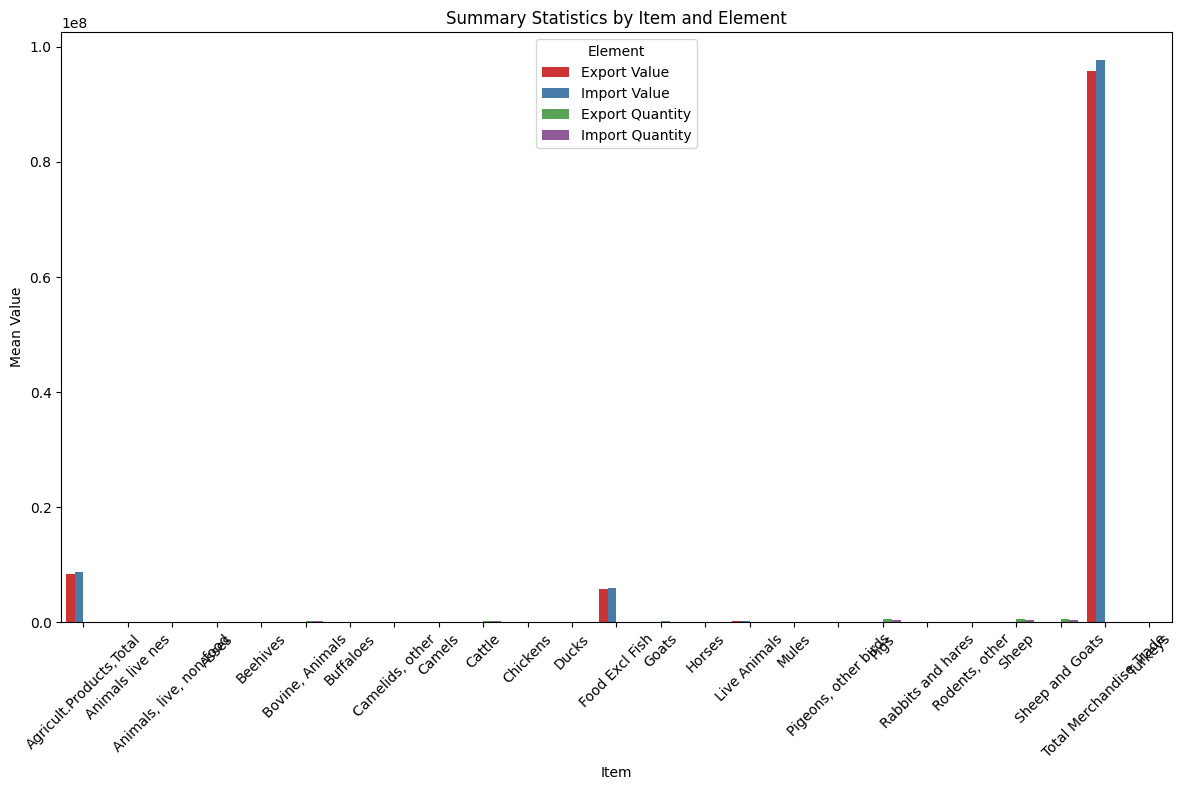

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group the data by 'Item' and 'Element' and calculate summary statistics
summary_by_item_element = sorted_df.groupby(['Item', 'Element'])['Value'].describe()

# Reset index to make 'Item' and 'Element' columns regular columns
summary_by_item_element = summary_by_item_element.reset_index()

# Create a bar plot for each item, grouped by 'Element'
plt.figure(figsize=(12, 8))
sns.barplot(data=summary_by_item_element, x='Item', y='mean', hue='Element')
plt.title('Summary Statistics by Item and Element')
plt.xlabel('Item')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Element')
plt.tight_layout()
plt.show()


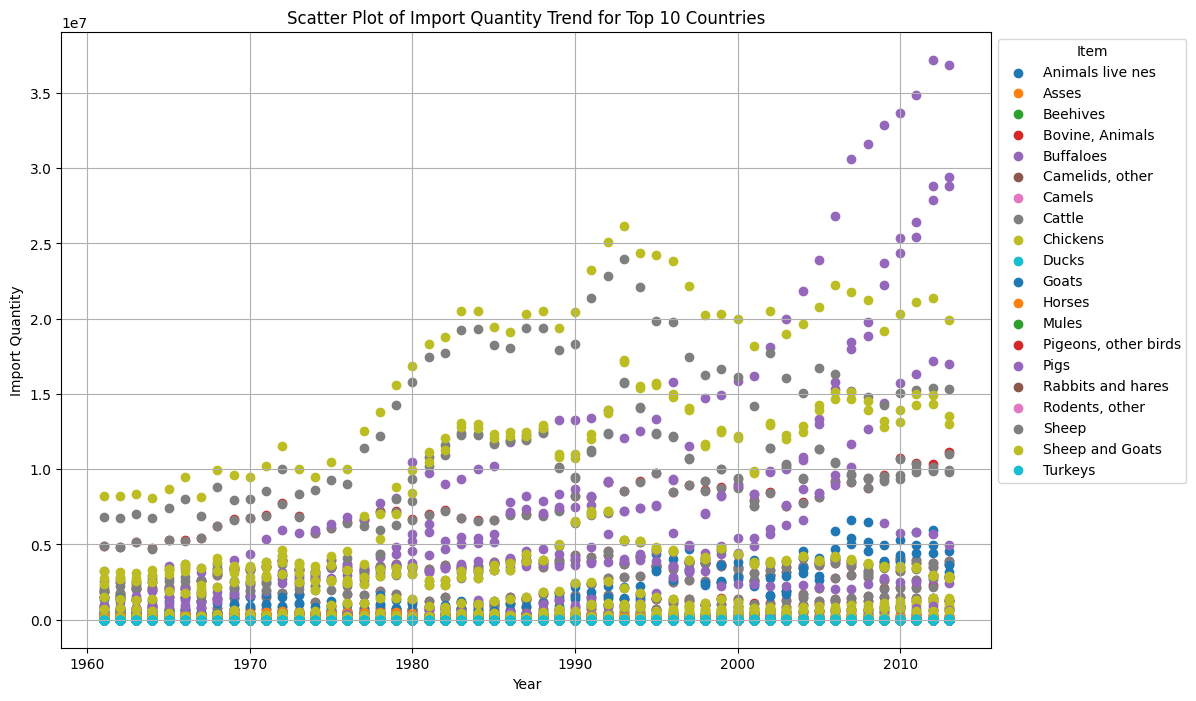

In [36]:
# Visualize the import quantity of all Items in the 'df_import_quantity' dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Select the top 10 countries
top_countries = df_import_quantity['Area'].value_counts().head(10).index

# Filter the dataset for top countries
top_countries_df = df_import_quantity[df_import_quantity['Area'].isin(top_countries)]

# Create a scatter plot for each item
plt.figure(figsize=(12, 8))
sns.set_palette("tab10")  # Set color palette

for item in top_countries_df['Item'].unique():
    item_data = top_countries_df[top_countries_df['Item'] == item]
    plt.scatter(item_data['Year'], item_data['Value'], label=item)

plt.title("Scatter Plot of Import Quantity Trend for Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


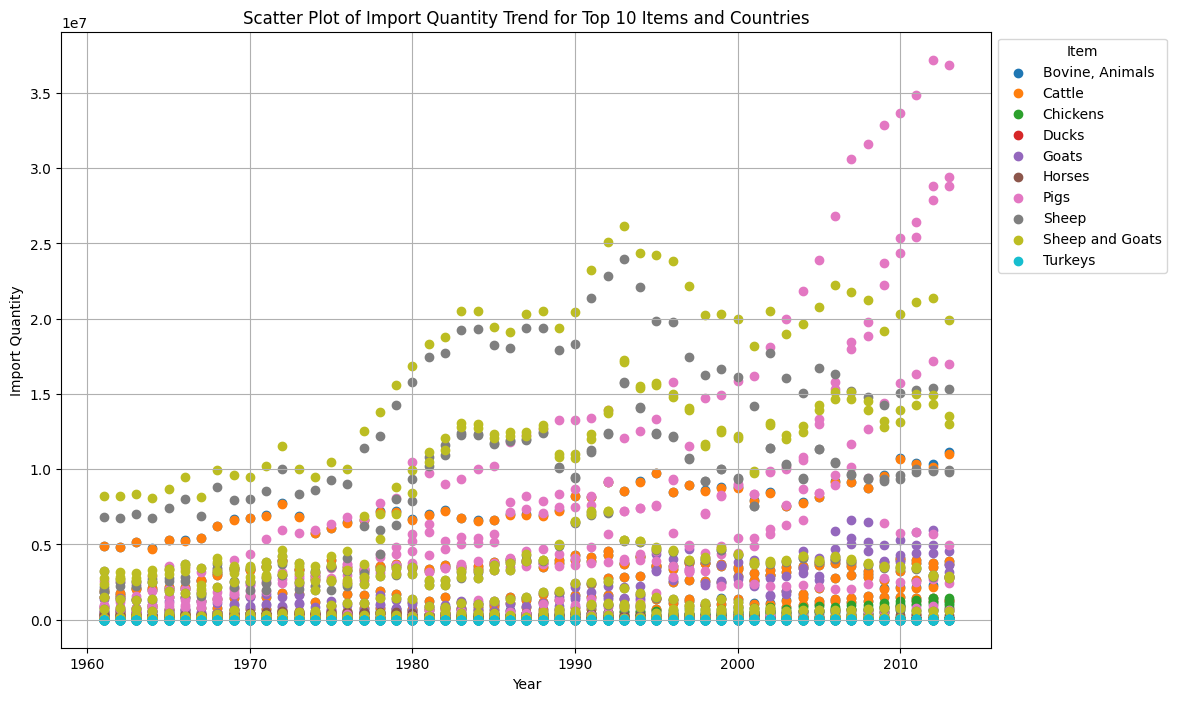

In [38]:
# Visualize the import quantity of the top 10 Items in the 'df_import_quantity' dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Select the top 10 countries and top 10 items
top_countries = df_import_quantity['Area'].value_counts().head(10).index
top_items = df_import_quantity['Item'].value_counts().head(10).index

# Filter the dataset for top countries and top items
top_data = df_import_quantity[(df_import_quantity['Area'].isin(top_countries)) &
                              (df_import_quantity['Item'].isin(top_items))]

# Define a custom color palette with distinct colors
distinct_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                   '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a scatter plot for each item using the custom color palette
plt.figure(figsize=(12, 8))
sns.set_palette(distinct_colors)

for item in top_data['Item'].unique():
    item_data = top_data[top_data['Item'] == item]
    plt.scatter(item_data['Year'], item_data['Value'], label=item)

plt.title("Scatter Plot of Import Quantity Trend for Top 10 Items and Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


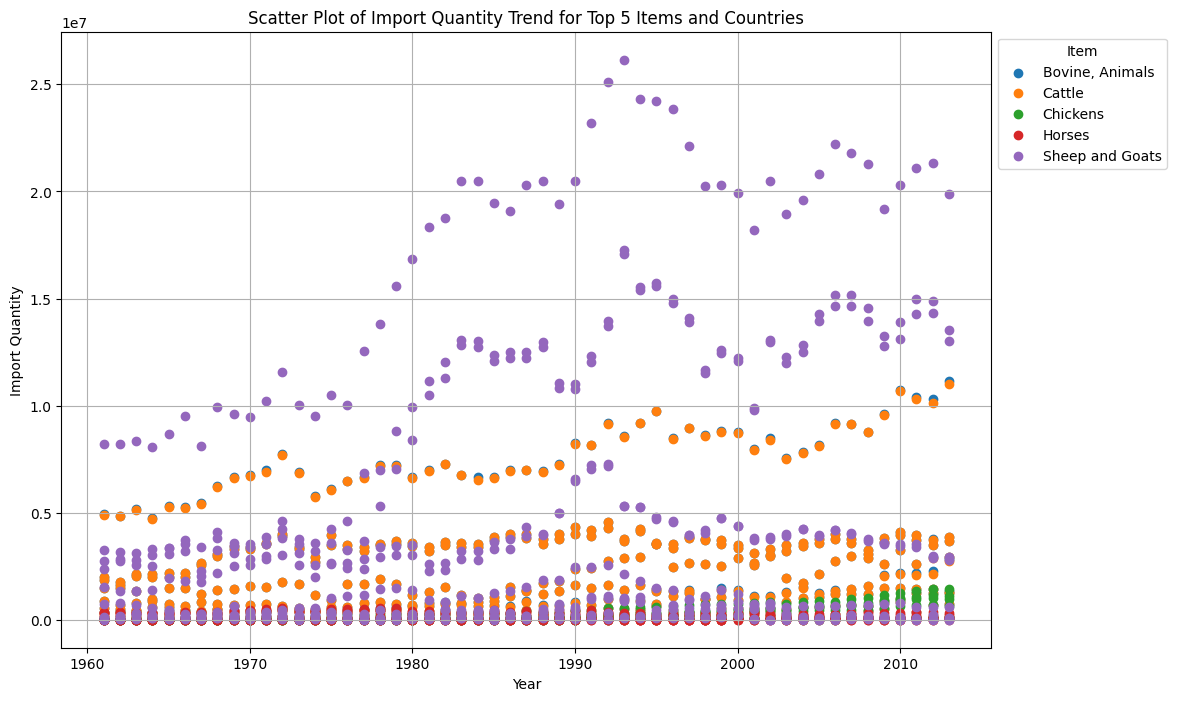

In [41]:
# Visualize the import quantity of the top 5 Items in the 'df_import_quantity' dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Select the top 10 countries and top 10 items
top_countries = df_import_quantity['Area'].value_counts().head(10).index
top_items = df_import_quantity['Item'].value_counts().head(5).index

# Filter the dataset for top countries and top items
top_data = df_import_quantity[(df_import_quantity['Area'].isin(top_countries)) &
                              (df_import_quantity['Item'].isin(top_items))]

# Define a custom color palette with distinct colors
distinct_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                   '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a scatter plot for each item using the custom color palette
plt.figure(figsize=(12, 8))
sns.set_palette(distinct_colors)

for item in top_data['Item'].unique():
    item_data = top_data[top_data['Item'] == item]
    plt.scatter(item_data['Year'], item_data['Value'], label=item)

plt.title("Scatter Plot of Import Quantity Trend for Top 5 Items and Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [43]:
# Display only 'Area', 'Item', 'Element', 'Year', 'Unit', 'Value' columns
# Save this dataset as df_export_quantity

import pandas as pd

# Assuming your sorted dataset is named 'df_sorted'
selected_columns = ['Area', 'Item', 'Element', 'Year', 'Unit', 'Value']
df_export_quantity = sorted_df[sorted_df['Element'] == 'Export Quantity'][selected_columns]

print("Selected Data:")
print(df_export_quantity)

# Save as df_import_quantity.csv
df_export_quantity.to_csv('df_export_quantity.csv', index=False)


Selected Data:
Empty DataFrame
Columns: [Area, Item, Element, Year, Unit, Value]
Index: []


In [30]:
import pandas as pd

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Sort the dataset by 'Item' and 'Element'
sorted_df = df_import_quantity.sort_values(by=['Item', 'Element'])

# Describe the sorted dataset
description_sorted = sorted_df.describe()
print(description_sorted)


                Year         Value
count  147865.000000  1.108200e+05
mean     1987.871085  1.452689e+05
std        15.341087  9.764733e+05
min      1961.000000  0.000000e+00
25%      1975.000000  0.000000e+00
50%      1989.000000  6.400000e+01
75%      2001.000000  4.417250e+03
max      2013.000000  3.720142e+07


In [16]:
import pandas as pd

# Assuming your dataset is named 'df'
unique_areas = df['Area'].unique()
unique_items = df['Item'].unique()
unique_elements = df['Element'].unique()
unique_flags = df['Flag'].unique()
unique_years = df['Year'].unique()

print("Unique Areas:", unique_areas)
print("Unique Items:", unique_items)
print("Unique Elements:", unique_elements)
print("Unique Flags:", unique_flags)
print("Year:", unique_years)


Unique Areas: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belgium-Luxembourg' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'China, Hong Kong SAR' 'China, Macao SAR' 'China, mainland'
 'China, Taiwan Province of' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 'Czechoslovakia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Ethio

In [8]:
# Data inspection

import pandas as pd

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

# Get the number of rows and columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display data types of columns
print("\nData types of columns:")
print(df.dtypes)

# Display column names
print("\nColumn names:")
print(df.columns)


First 10 rows of the dataset:
   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   
5          2  Afghanistan        866  Cattle          5608  Import Quantity   
6          2  Afghanistan        866  Cattle          5608  Import Quantity   
7          2  Afghanistan        866  Cattle          5608  Import Quantity   
8          2  Afghanistan        866  Cattle          5608  Import Quantity   
9          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  He

In [7]:
# 3.3.Save copy of uncleaned df dataset as df1

import pandas as pd

# Create a copy of the original DataFrame
df1 = df.copy()

# Save the copy as a new CSV file
df1.to_csv('uncleaned_dataset.csv', index=False)


In [9]:
# Step 4. Data Exploration:
# 4.1. Perform initial data profiling to understand the structure and size of the dataset (df).

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get the number of rows and columns
num_rows, num_cols = df.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# Display basic summary statistics
summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)

# Display data types of columns
print("\nData types of columns:")
print(df.dtypes)

# Display column names
print("\nColumn names:")
print(df.columns)



First few rows of the dataset:
   Area Code         Area  Item Code    Item  Element Code          Element  \
0          2  Afghanistan        866  Cattle          5608  Import Quantity   
1          2  Afghanistan        866  Cattle          5608  Import Quantity   
2          2  Afghanistan        866  Cattle          5608  Import Quantity   
3          2  Afghanistan        866  Cattle          5608  Import Quantity   
4          2  Afghanistan        866  Cattle          5608  Import Quantity   

   Year Code  Year  Unit  Value Flag  
0       1961  1961  Head    NaN    M  
1       1962  1962  Head    NaN    M  
2       1963  1963  Head    NaN    M  
3       1964  1964  Head    NaN    M  
4       1965  1965  Head    NaN    M  

Number of rows: 662958
Number of columns: 11

Summary Statistics:
           Area Code      Item Code   Element Code      Year Code  \
count  662958.000000  662958.000000  662958.000000  662958.000000   
mean     1392.974730    1221.484604    5755.596121    1

In [10]:
# 4.2. Examine data types, missing values, and potential data quality issues.

# Display data types of columns
print("Data types of columns:")
print(df.dtypes)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Display potential data quality issues (unique values count) for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nPotential Data Quality Issues (Categorical Columns):")
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"{column}: {unique_values_count} unique values")

# Display potential data quality issues (min-max range) for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nPotential Data Quality Issues (Numerical Columns):")
for column in numerical_columns:
    column_range = df[column].max() - df[column].min()
    print(f"{column}: Range = {column_range}")


Data types of columns:
Area Code         int64
Area             object
Item Code         int64
Item             object
Element Code      int64
Element          object
Year Code         int64
Year              int64
Unit             object
Value           float64
Flag             object
dtype: object

Missing Values:
Area Code            0
Area                 0
Item Code            0
Item                 0
Element Code         0
Element              0
Year Code            0
Year                 0
Unit                 0
Value           135190
Flag            203064
dtype: int64

Potential Data Quality Issues (Categorical Columns):
Area: 252 unique values
Item: 25 unique values
Element: 4 unique values
Unit: 4 unique values
Flag: 5 unique values

Potential Data Quality Issues (Numerical Columns):
Area Code: Range = 57059
Item Code: Range = 1972
Element Code: Range = 315
Year Code: Range = 52
Year: Range = 52
Value: Range = 18818758989.0


In [106]:
pip install prophet


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

# Load df from CSV (if not already loaded)
df = pd.read_csv('your_dataset.csv')

# Select all EU member countries
eu_countries = ['Country1', 'Country2', ...]  # Replace with actual EU member country names

# Filter the data for EU member countries and 'Import Quantity'
eu_data = df[(df['Area'].isin(eu_countries)) & (df['Element'] == 'Import Quantity')][['Year', 'Value']]
eu_data_grouped = eu_data.groupby('Year').sum().reset_index()
eu_data_grouped.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(eu_data_grouped)

# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=5, freq='Y')  # Adjust the number of periods and frequency

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title("Import Quantity of Cattle Forecast for European Union")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.show()

# Get the predicted import quantity for the last year in the forecast
predicted_import = forecast.loc[forecast['ds'].idxmax()]['yhat']
print(f"Predicted import quantity for European Union in {forecast['ds'].max().year}: {predicted_import:.2f}")


ModuleNotFoundError: ignored

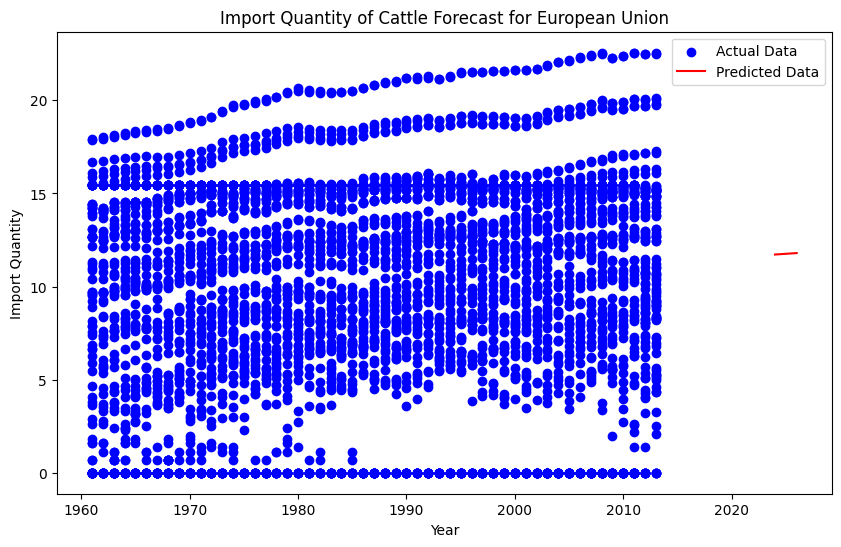

In [109]:
# Q4
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Select a specific country for prediction
country_to_predict = 'European Union'  # Replace with your country

# Filter the data for the selected country
country_data = df[df['Area'] == country_to_predict]

# Prepare the data for regression
X = country_data['Year'].values.reshape(-1, 1)
y = country_data['Value'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict import quantity for future years
future_years = np.array([2024, 2025, 2026])  # Replace with your desired years
predicted_imports = model.predict(future_years.reshape(-1, 1))

# Visualize the predicted import quantities
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(future_years, predicted_imports, color='red', label='Predicted Data')
plt.title(f"Import Quantity of Cattle Forecast for {country_to_predict}")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend()
plt.show()


In [11]:
# 4.3. Calculate summary statistics to gain a basic understanding of the data's distribution.

# Calculate summary statistics for numerical columns
summary_stats = df['Value'].describe()
print("Summary Statistics:")
print(summary_stats)

# Calculate summary statistics for specific columns
specific_columns = ['Value']  # Replace with your column names
specific_stats = df[specific_columns].describe()
print("\nSummary Statistics for Specific Columns:")
print(specific_stats)


Summary Statistics:
count    5.277680e+05
mean     5.111931e+06
std      1.306099e+08
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+02
75%      1.911800e+04
max      1.881876e+10
Name: Value, dtype: float64

Summary Statistics for Specific Columns:
              Value
count  5.277680e+05
mean   5.111931e+06
std    1.306099e+08
min    0.000000e+00
25%    0.000000e+00
50%    2.000000e+02
75%    1.911800e+04
max    1.881876e+10


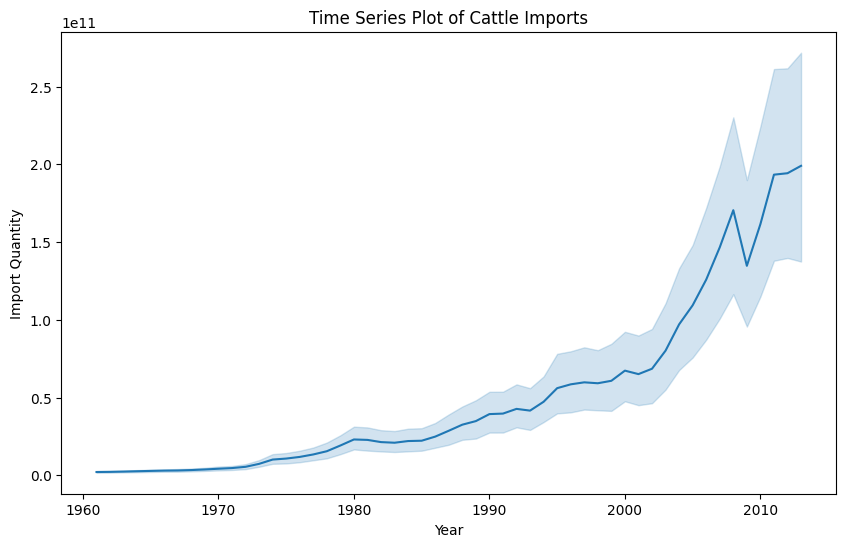

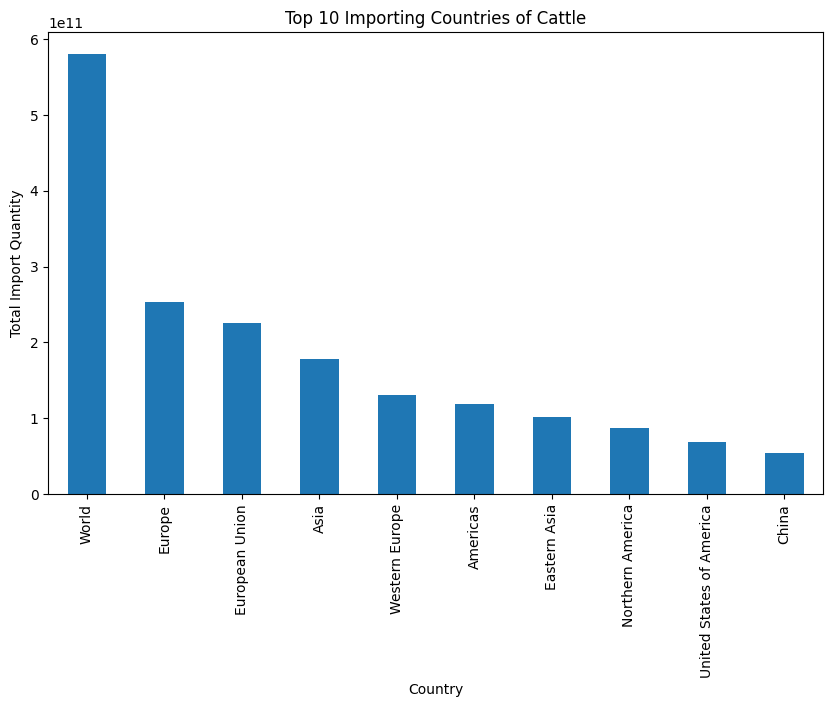

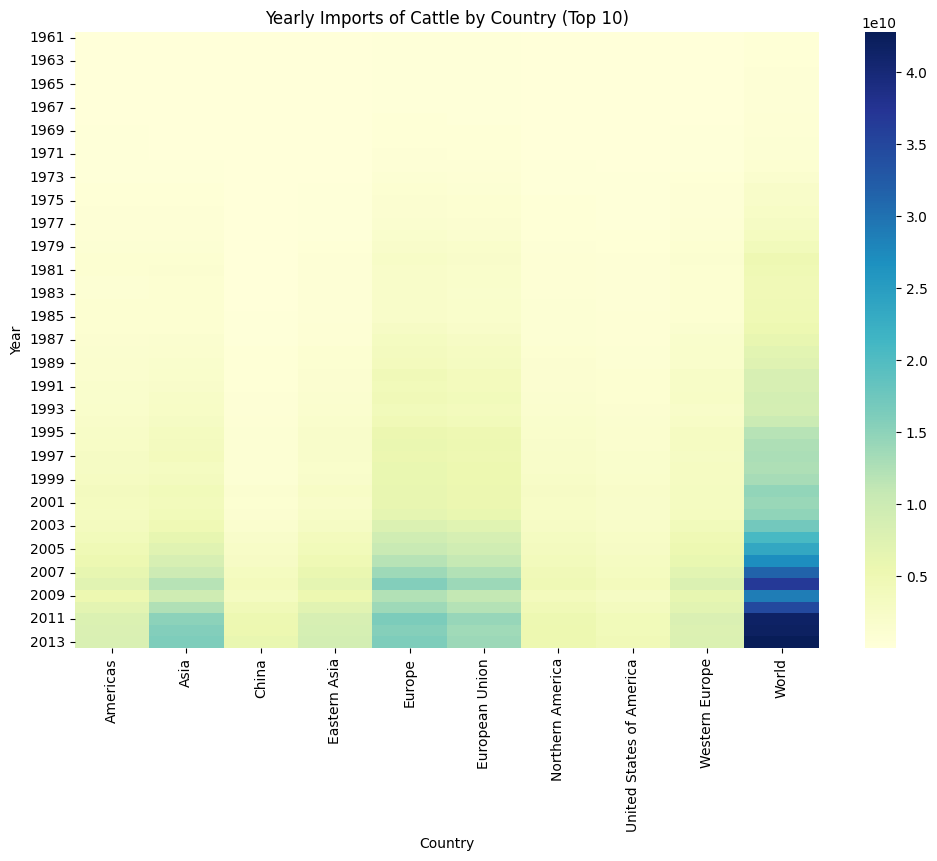

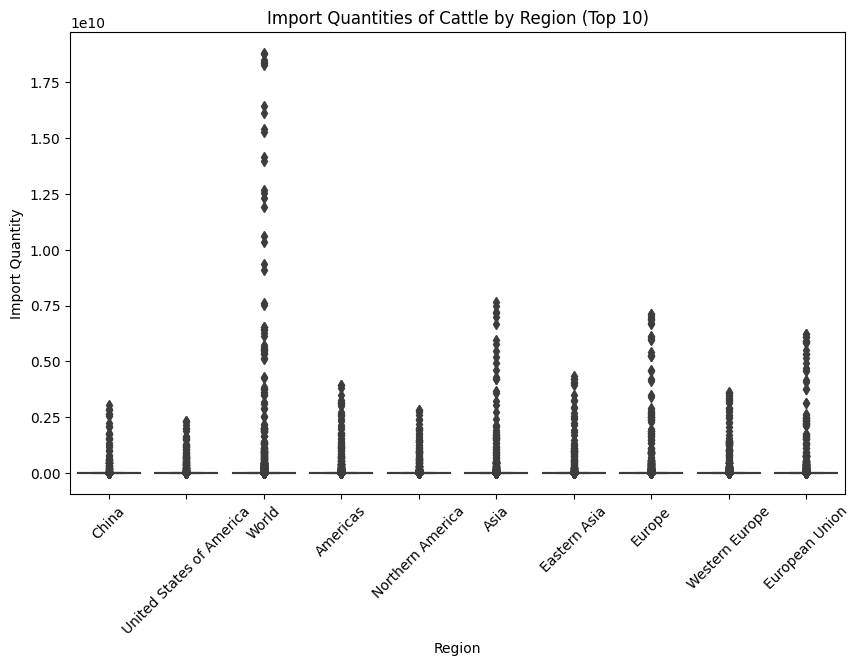

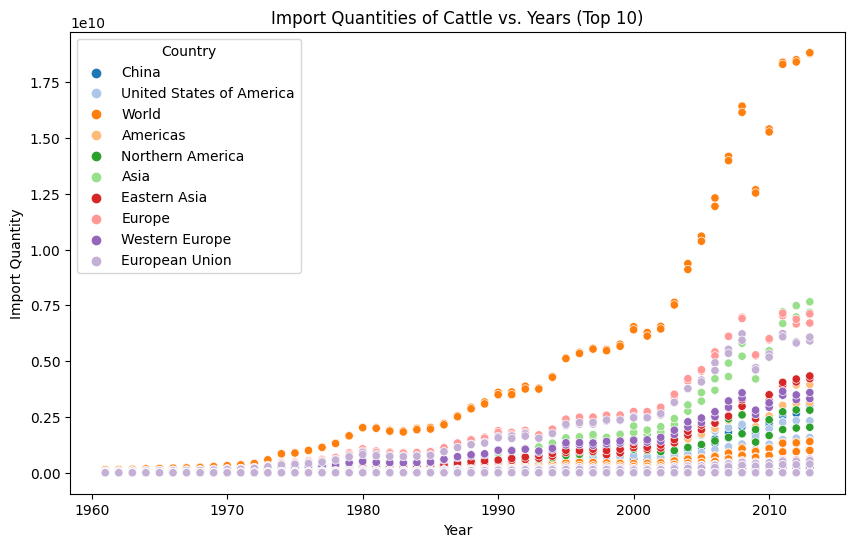

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization 1: Time Series Plot of Cattle Imports
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=df, estimator='sum')
plt.title('Time Series Plot of Cattle Imports')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.show()

# Visualization 2: Bar Chart of Top 10 Importing Countries
top_countries = df.groupby('Area')['Value'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Importing Countries of Cattle')
plt.xlabel('Country')
plt.ylabel('Total Import Quantity')
plt.show()

# Visualization 3: Heatmap of Yearly Imports by Country (Top 10)
top_countries_list = top_countries.index.tolist()
heatmap_data = df[df['Area'].isin(top_countries_list)].pivot_table(values='Value', index='Year', columns='Area', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Yearly Imports of Cattle by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

# Visualization 4: Box Plot of Import Quantities by Region (Top 10)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Value', data=df[df['Area'].isin(top_countries_list)])
plt.title('Import Quantities of Cattle by Region (Top 10)')
plt.xlabel('Region')
plt.ylabel('Import Quantity')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Scatter Plot of Import Quantities vs. Years (Top 10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=df[df['Area'].isin(top_countries_list)], hue='Area', palette='tab20')
plt.title('Import Quantities of Cattle vs. Years (Top 10)')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.legend(title='Country')
plt.show()


In [70]:
# Step 5. Data Cleaning:
# 5.1. Identify and handle missing values through imputation or removal.

import pandas as pd

# Impute missing values with mean for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())




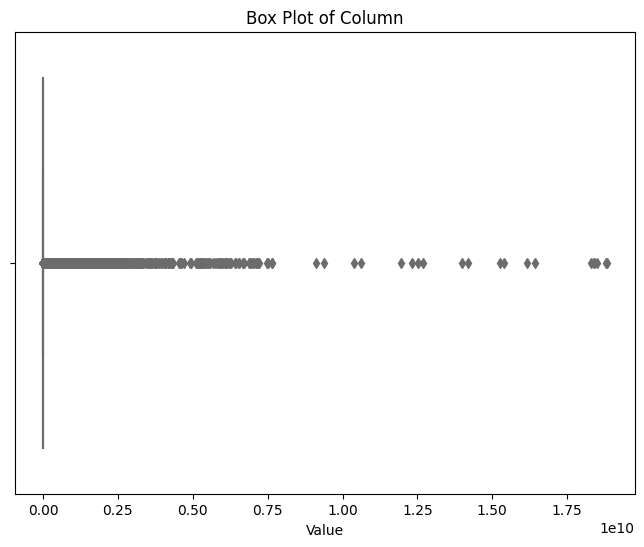

Detected Outliers:
        Area Code                                     Area  Item Code  \
22394          10                                Australia         10   
22395          10                                Australia         10   
22396          10                                Australia         10   
22447          10                                Australia         10   
22448          10                                Australia         10   
...           ...                                      ...        ...   
662211       5817  Net Food Importing Developing Countries         10   
662212       5817  Net Food Importing Developing Countries         10   
662213       5817  Net Food Importing Developing Countries         10   
662214       5817  Net Food Importing Developing Countries         10   
662215       5817  Net Food Importing Developing Countries         10   

                           Item  Element Code       Element  Year Code  Year  \
22394   Total Merchandis

In [71]:
# Detect data outliers and anomalies
# Box Plots: Outliers appear as individual data points outside the whiskers.

import matplotlib.pyplot as plt
import seaborn as sns


# Box plot for a specific column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title('Box Plot of Column')
plt.show()



# Z-Score: Calculate the Z-score for each data point. Z-score measures how many standard deviations a data point is away from the mean. Typically, a threshold of around 2 or 3 is used to identify outliers.

from scipy.stats import zscore

# Calculate Z-scores for the 'Value' column (or the correct column name)
z_scores = zscore(df['Value'])  # Replace 'Value' with the correct column name
outliers = df[abs(z_scores) > 2]  # Adjust threshold as needed
print("Detected Outliers:")
print(outliers)


# IQR (Interquartile Range): Calculate the IQR for a column and identify outliers that fall outside the range of Q1 - 1.5 * IQR to Q3 + 1.5 * IQR.

# Calculate Q1, Q3, and IQR for the 'Value' column
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Value'] < Q1 - 1.5 * IQR) | (df['Value'] > Q3 + 1.5 * IQR)]
print("Detected Outliers:")
print(outliers)




In [72]:
# 5.2. Address data outliers and anomalies using appropriate techniques.

# Apply log transformation to a numerical column

import numpy as np

df['Value'] = df['Value'].apply(lambda x: np.log(x) if x > 0 else x)








In [ ]:
#  Data Visualization

Visualization:

Line Chart: Display the import quantity of cattle over the years for each country using a line chart. Each country can be represented by a different colored line, allowing you to observe trends and variations over time.
Diagnostic Question: Are there specific years or countries where there have been significant changes in cattle import quantity?

Heatmap: Create a heatmap where each cell represents the import quantity for a specific year and country. Use color intensity to indicate the magnitude of import quantity, helping you identify specific years or countries with significant changes.
Predictive Question: Can we predict the future import quantity of cattle for a specific country?

Time Series Forecast Plot: Use a time series forecast plot to visualize historical import quantities and predicted future import quantities for a specific country. Overlay the predicted values on the actual data points to assess the accuracy of the prediction.
Prescriptive Question: What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

Bubble Chart: Create a bubble chart where each bubble represents a country. The x-axis can represent the import quantity, the y-axis can represent a relevant factor (e.g., GDP, population), and the size of the bubble can represent the potential for optimization. This allows you to identify countries with high import quantities that can be optimized based on different factors.


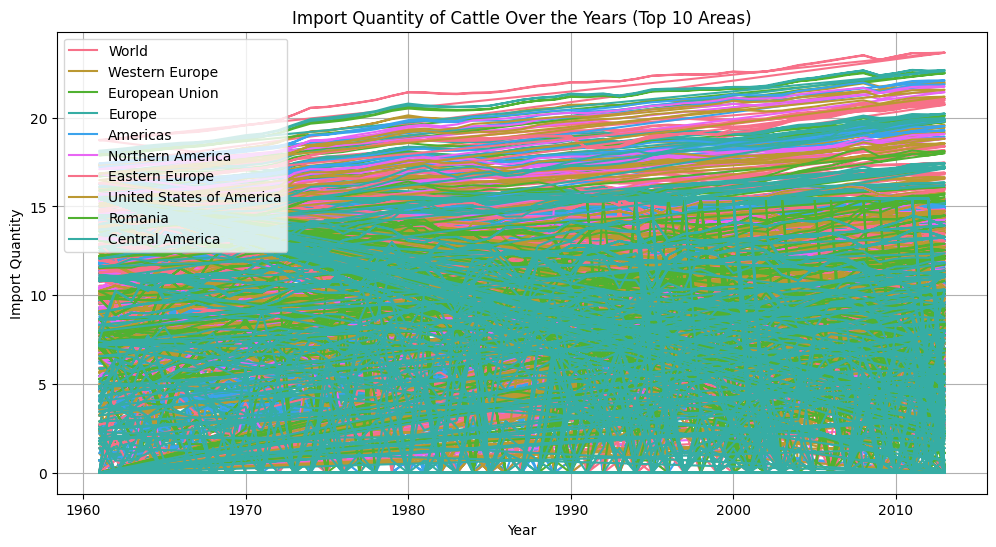

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
# df = ...

# Calculate the total import quantity for each area
area_import_quantity = df.groupby('Area')['Value'].sum()

# Select the top 10 areas with the highest import quantity
top_areas = area_import_quantity.nlargest(10).index

# Filter the data for the top 10 areas
data_top_areas = df[df['Area'].isin(top_areas)]

# Create a line chart for each area
plt.figure(figsize=(12, 6))
for area in top_areas:
    area_data = data_top_areas[data_top_areas['Area'] == area]
    plt.plot(area_data['Year'], area_data['Value'], label=area)

plt.title("Import Quantity of Cattle Over the Years (Top 10 Areas)")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


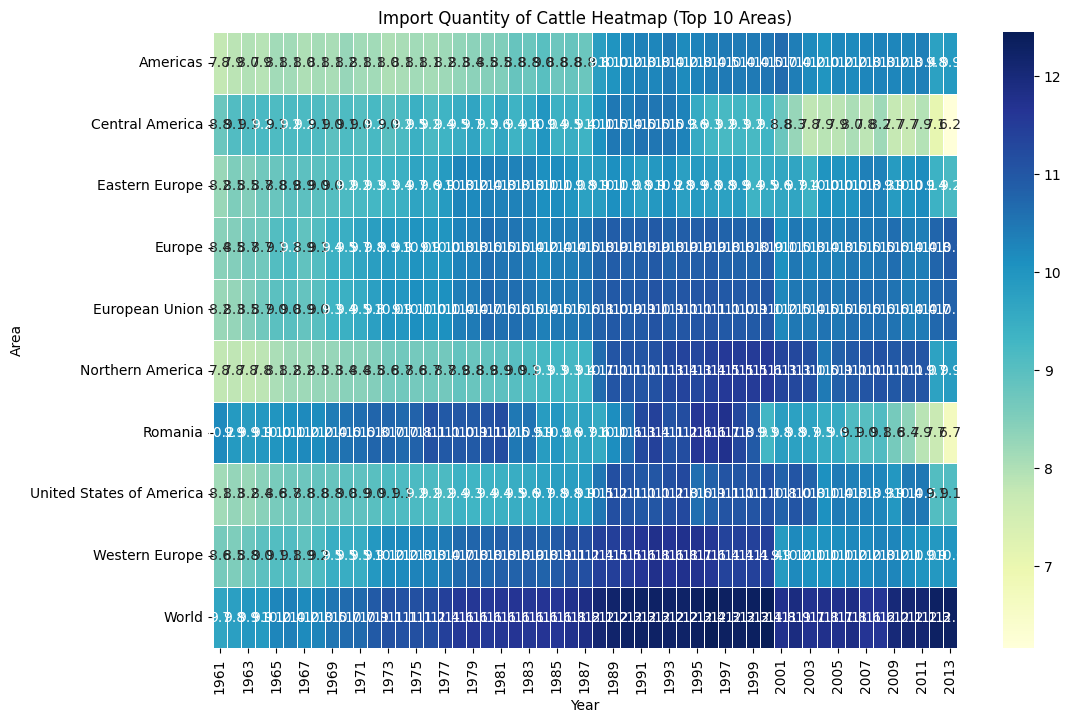

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = ...

# Calculate the total import quantity for each area
area_import_quantity = df.groupby('Area')['Value'].sum()

# Select the top 10 areas with the highest import quantity
top_areas = area_import_quantity.nlargest(10).index

# Filter the data for the top 10 areas
data_top_areas = df[df['Area'].isin(top_areas)]

# Create a pivot table for the heatmap
heatmap_data = data_top_areas.pivot_table(index='Area', columns='Year', values='Value')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=0.5)
plt.title("Import Quantity of Cattle Heatmap (Top 10 Areas)")
plt.xlabel("Year")
plt.ylabel("Area")
plt.show()


<ipython-input-38-1a2209407027>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Optimization_Potential'] = data['Value'] / data['Year']


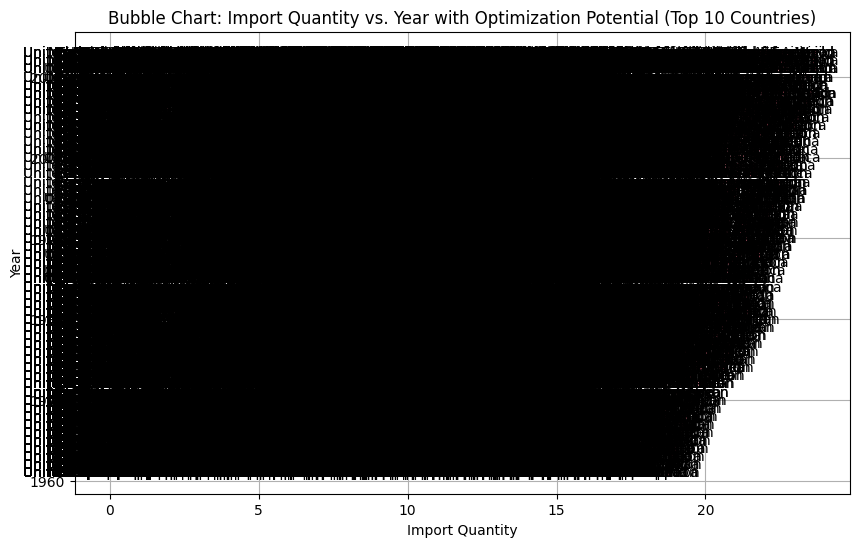

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant columns for the analysis
relevant_columns = ['Area', 'Value', 'Year']  # Adjust columns as needed
data = df[relevant_columns]

# Calculate potential for optimization (you can customize this calculation)
data['Optimization_Potential'] = data['Value'] / data['Year']

# Filter data for the top 10 countries
top_10_countries = data.groupby('Area').sum().nlargest(10, 'Value').index
data_top_10 = data[data['Area'].isin(top_10_countries)]

# Create a bubble chart for top 10 countries
plt.figure(figsize=(10, 6))
plt.scatter(data_top_10['Value'], data_top_10['Year'], s=data_top_10['Optimization_Potential']*1000, alpha=0.7)
plt.title("Bubble Chart: Import Quantity vs. Year with Optimization Potential (Top 10 Countries)")
plt.xlabel("Import Quantity")
plt.ylabel("Year")
plt.grid(True)

# Add country labels to bubbles
for i, row in data_top_10.iterrows():
    plt.text(row['Value'], row['Year'], row['Area'], ha='center', va='center')

# Show the plot
plt.show()


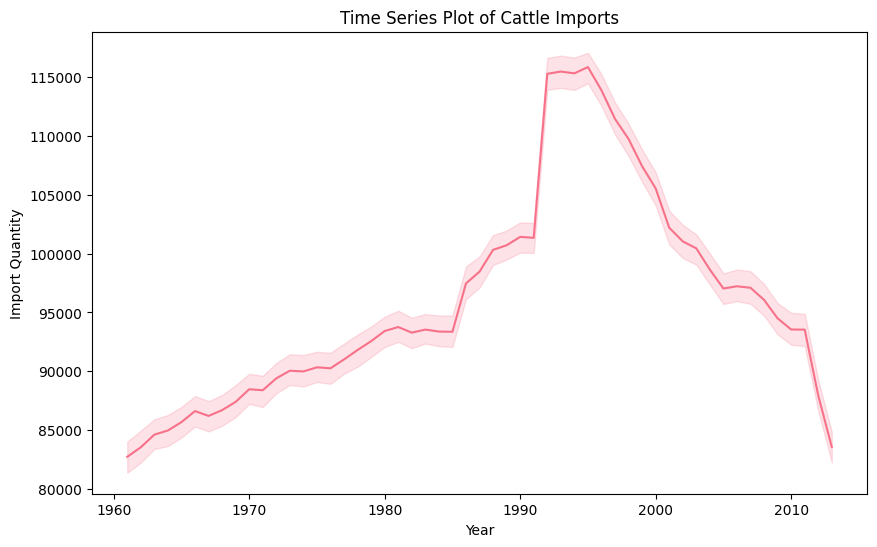

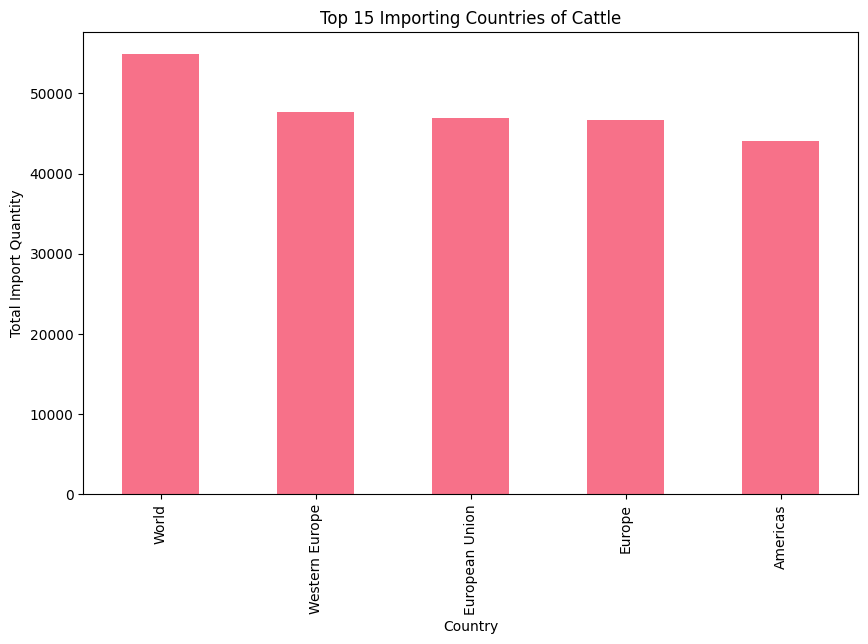

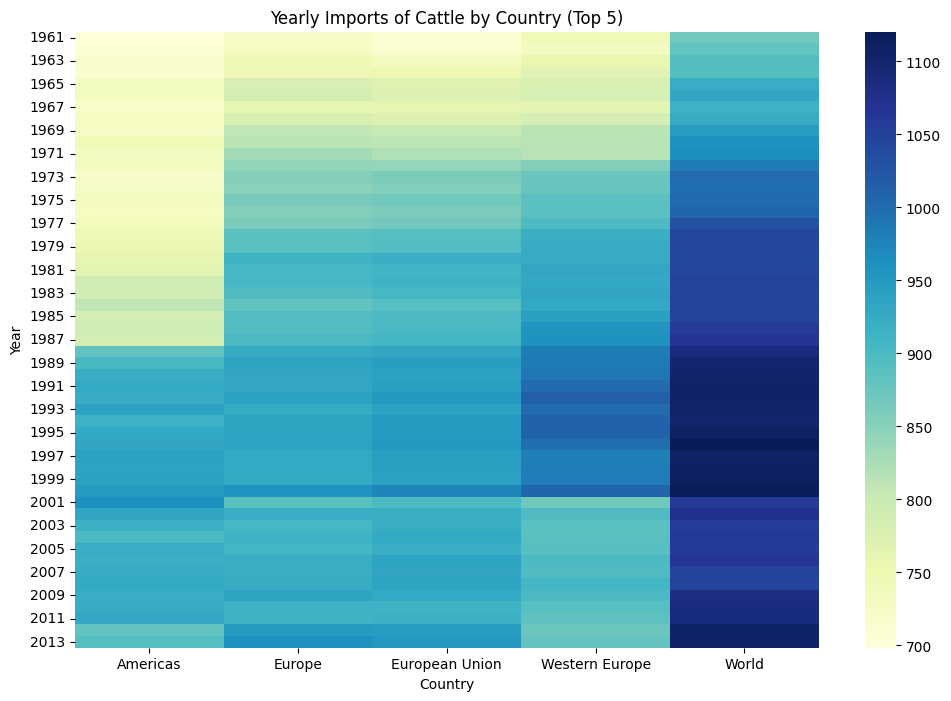

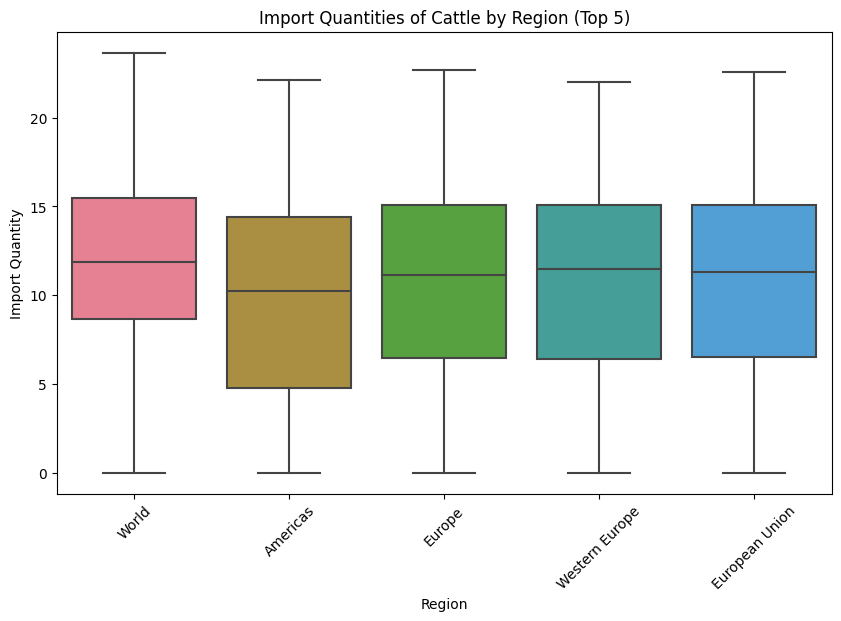

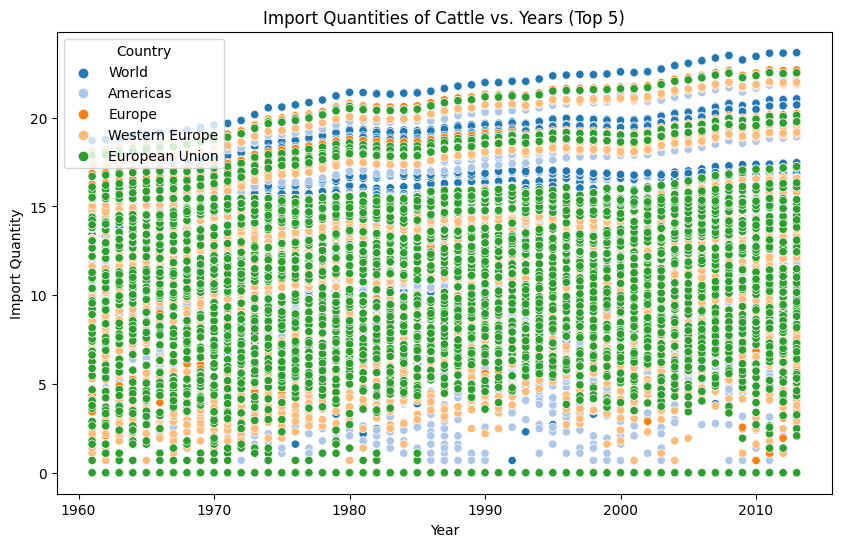

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization 1: Time Series Plot of Cattle Imports
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Value', data=df, estimator='sum')
plt.title('Time Series Plot of Cattle Imports')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.show()

# Visualization 2: Bar Chart of Top 15 Importing Countries
top_countries = df.groupby('Area')['Value'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Top 15 Importing Countries of Cattle')
plt.xlabel('Country')
plt.ylabel('Total Import Quantity')
plt.show()

# Visualization 3: Heatmap of Yearly Imports by Country (Top 5)
top_countries_list = top_countries.index.tolist()
heatmap_data = df[df['Area'].isin(top_countries_list)].pivot_table(values='Value', index='Year', columns='Area', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Yearly Imports of Cattle by Country (Top 5)')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()

# Visualization 4: Box Plot of Import Quantities by Region (Top 5)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Value', data=df[df['Area'].isin(top_countries_list)])
plt.title('Import Quantities of Cattle by Region (Top 5)')
plt.xlabel('Region')
plt.ylabel('Import Quantity')
plt.xticks(rotation=45)
plt.show()

# Visualization 5: Scatter Plot of Import Quantities vs. Years (Top 5)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Value', data=df[df['Area'].isin(top_countries_list)], hue='Area', palette='tab20')
plt.title('Import Quantities of Cattle vs. Years (Top 5)')
plt.xlabel('Year')
plt.ylabel('Import Quantity')
plt.legend(title='Country')
plt.show()


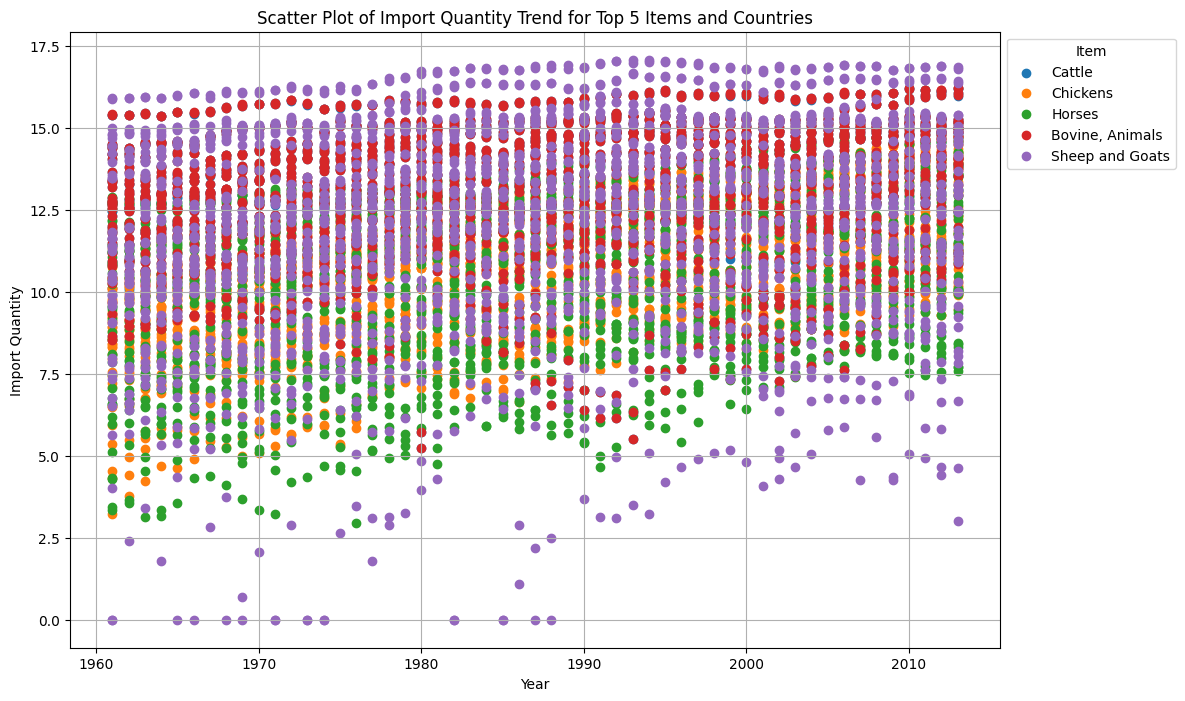

In [76]:
# Visualize the import quantity of the top 5 Items in the 'df_import_quantity' dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select the top 10 countries and top 10 items
top_countries = df['Area'].value_counts().head(10).index
top_items = df['Item'].value_counts().head(5).index

# Filter the dataset for top countries and top items
top_data = df[(df['Area'].isin(top_countries)) &
                              (df['Item'].isin(top_items))]

# Define a custom color palette with distinct colors
distinct_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                   '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a scatter plot for each item using the custom color palette
plt.figure(figsize=(12, 8))
sns.set_palette(distinct_colors)

for item in top_data['Item'].unique():
    item_data = top_data[top_data['Item'] == item]
    plt.scatter(item_data['Year'], item_data['Value'], label=item)

plt.title("Scatter Plot of Import Quantity Trend for Top 5 Items and Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


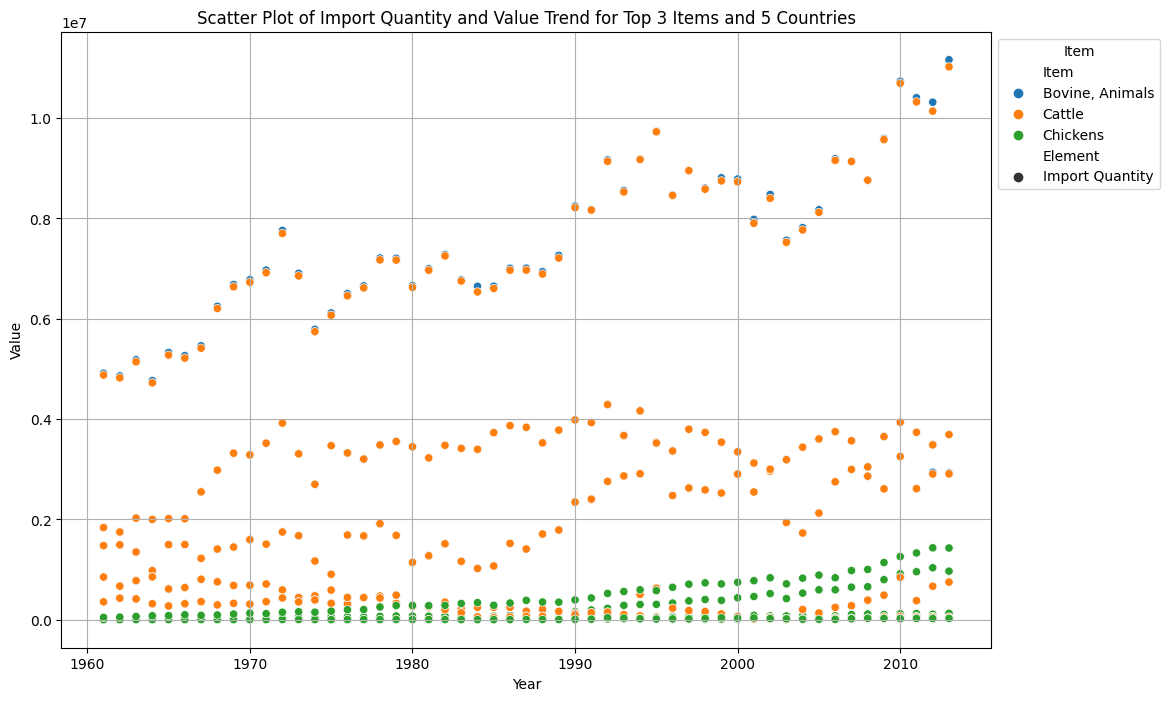

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load df_import_quantity from CSV (if not already loaded)
df_import_quantity = pd.read_csv('df_import_quantity.csv')

# Select the top 5 countries and top 3 items
top_countries = df_import_quantity['Area'].value_counts().head(5).index
top_items = df_import_quantity['Item'].value_counts().head(3).index

# Filter the dataset for top countries and top items
top_data = df_import_quantity[(df_import_quantity['Area'].isin(top_countries)) &
                              (df_import_quantity['Item'].isin(top_items))]

# Set the custom color palette
sns.set_palette("tab10")

# Create a scatter plot for 'Import Quantity' and 'Import Value'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_data, x='Year', y='Value', hue='Item', style='Element')
plt.title("Scatter Plot of Import Quantity and Value Trend for Top 3 Items and 5 Countries")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


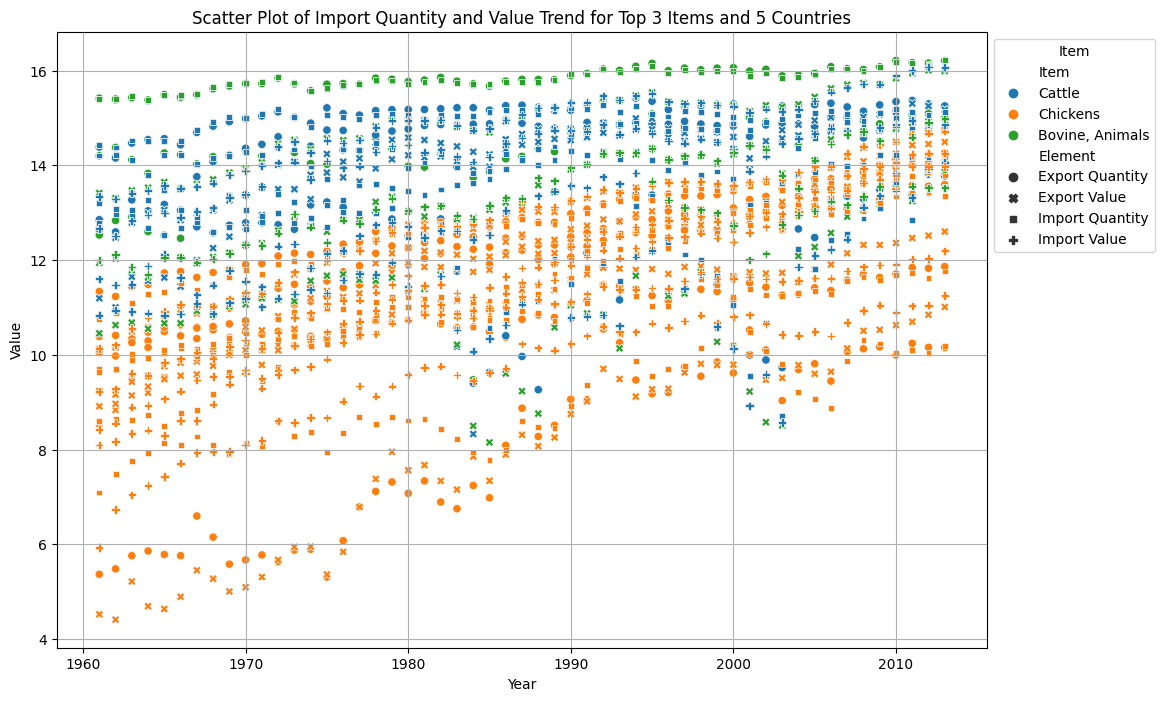

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Select the top 5 countries and top 3 items
top_countries = sorted_df['Area'].value_counts().head(5).index
top_items = sorted_df['Item'].value_counts().head(3).index

# Filter the dataset for top countries and top items
top_data = sorted_df[(sorted_df['Area'].isin(top_countries)) &
                     (sorted_df['Item'].isin(top_items))]

# Set the custom color palette
sns.set_palette("tab10")

# Create a scatter plot for 'Import Quantity' and 'Import Value'
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_data, x='Year', y='Value', hue='Item', style='Element')
plt.title("Scatter Plot of Import Quantity and Value Trend for Top 3 Items and 5 Countries")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


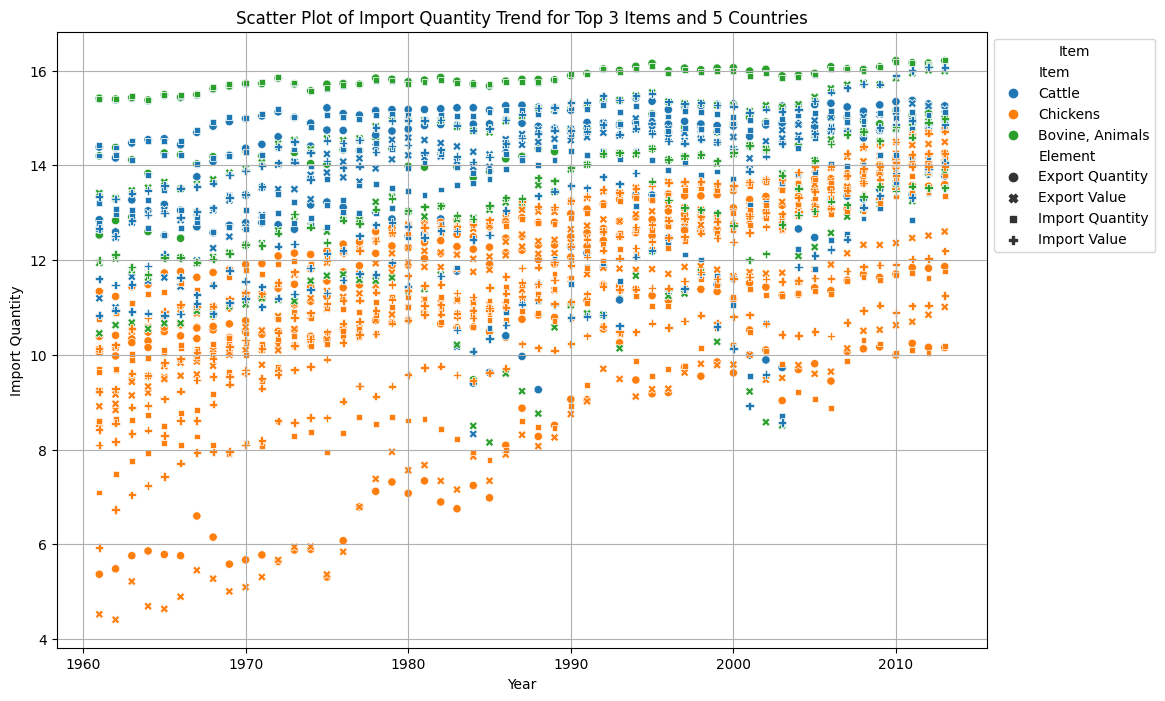

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the df dataset from CSV (if not already loaded)

# Sort the df dataset by 'Element'
sorted_df = df.sort_values(by='Element')

# Select the top 5 countries and top 3 items
top_countries = sorted_df['Area'].value_counts().head(5).index
top_items = sorted_df['Item'].value_counts().head(3).index

# Filter the dataset for top countries and top items
top_data = sorted_df[(sorted_df['Area'].isin(top_countries)) &
                     (sorted_df['Item'].isin(top_items))]

# Set the custom color palette
sns.set_palette("tab10")

# Create a scatter plot for the trend
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_data, x='Year', y='Value', hue='Item', style='Element')
plt.title("Scatter Plot of Import Quantity Trend for Top 3 Items and 5 Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


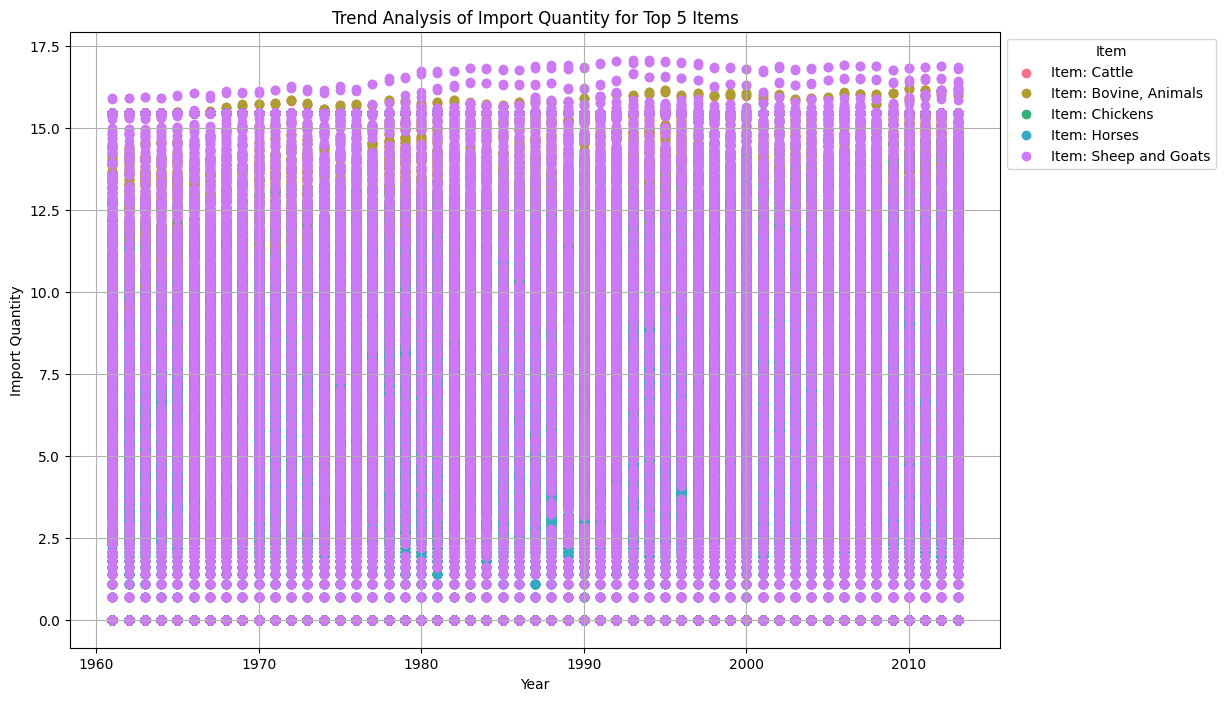

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Select the top 5 items
top_items = df['Item'].value_counts().head(5).index

# Filter the dataset for top items
top_data = df[df['Item'].isin(top_items)]

# Create a scatter plot for each item in the top 5 items
plt.figure(figsize=(12, 8))
sns.set_palette("husl", n_colors=len(top_items))

for item in top_items:
    item_data = top_data[top_data['Item'] == item]
    plt.scatter(item_data['Year'], item_data['Value'], label=f"Item: {item}")

plt.title("Trend Analysis of Import Quantity for Top 5 Items")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Item', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

**Appropriate Statistical Test:**

**Descriptive Question:** What is the trend in import quantity of cattle across different countries over the years?

Hypothesis Test: One-Way ANOVA (Analysis of Variance) to determine if there are significant differences in import quantities among different countries over the years.

Statistical Analysis: Calculate the mean and standard deviation of import quantities for each country. Perform ANOVA and post-hoc tests (e.g., Tukey's HSD) to identify countries with significantly different import quantities.

**Diagnostic Question:** Are there specific years or countries where there have been significant changes in cattle import quantity?

Hypothesis Test: Chi-Square Test for Independence to determine if there's a significant association between years and countries with high/low import quantities.

Statistical Analysis: Create a contingency table with years and import quantities categorized as high/low for each country. Perform the Chi-Square Test to check for associations.

**Predictive Question:** Can we predict the future import quantity of cattle for a specific country?

Hypothesis Test: None (this question is more focused on prediction than hypothesis testing).

Statistical Analysis: Time Series Analysis, possibly using techniques like ARIMA (AutoRegressive Integrated Moving Average) or Prophet, to build a predictive model. Evaluate the model's performance using metrics like Mean Absolute Error (MAE) or Root Mean Squared Error (RMSE).

**Prescriptive Question:** What strategies can be implemented to optimize cattle import quantities while considering different countries and years?

Hypothesis Test: Two-Sample T-Test to compare the mean import quantities between two different groups (e.g., countries with different economic conditions).

Statistical Analysis: Divide countries into relevant groups (e.g., high GDP vs. low GDP) and perform a T-Test to determine if there's a significant difference in import quantities. Analyze effect sizes to understand the practical significance.

ANOVA Results:
F-statistic: 222.71463191673334
P-value: 0.0

Tukey's HSD Post-Hoc Test:


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



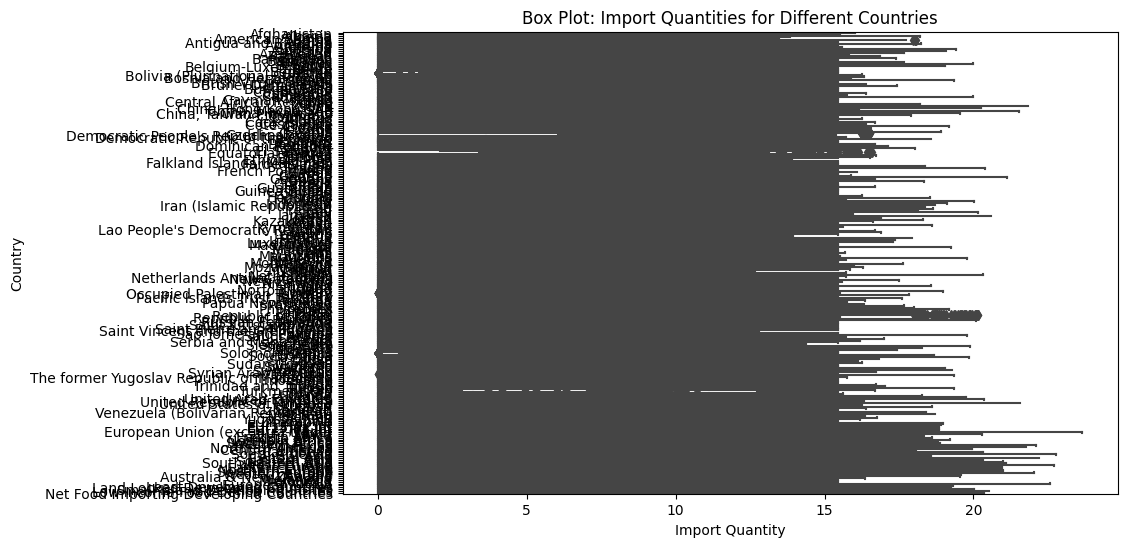

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load your dataset
# df = ...

# Select relevant columns for the analysis
relevant_columns = ['Area', 'Value']  # Adjust columns as needed
data = df[relevant_columns]

# Calculate the mean and standard deviation of import quantities for each country
country_stats = data.groupby('Area')['Value'].agg(['mean', 'std'])

# Perform ANOVA to compare means of import quantities among countries
groups = [group['Value'] for name, group in data.groupby('Area')]
f_statistic, p_value = f_oneway(*groups)

print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(data['Value'], data['Area'])
print("\nTukey's HSD Post-Hoc Test:")
print(tukey_results)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', y='Area', data=data)
plt.title("Box Plot: Import Quantities for Different Countries")
plt.xlabel("Import Quantity")
plt.ylabel("Country")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load your dataset
# df = ...

# Select relevant columns for the analysis
relevant_columns = ['Area', 'Year', 'Value']  # Adjust columns as needed
data = df[relevant_columns]

# Get the top 10 countries based on mean import quantity
top_countries = data.groupby('Area')['Value'].mean().nlargest(10).index

# Filter the data for the top 10 countries
top_data = data[data['Area'].isin(top_countries)]

# Categorize import quantities as high/low based on some threshold (adjust as needed)
threshold = top_data['Value'].median()
top_data['Import_Category'] = np.where(top_data['Value'] >= threshold, 'High', 'Low')

# Create a contingency table
contingency_table = pd.crosstab(top_data['Year'], [top_data['Area'], top_data['Import_Category']])

# Perform Chi-Square Test for associations
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

# Interpret the results
if p_value < 0.05:
    print("There is a significant association between years and import quantity categories.")
else:
    print("There is no significant association between years and import quantity categories.")


Chi-Square Test Results:
Chi-Square Statistic: 4373.057925917984
P-value: 0.0
Degrees of Freedom: 988
There is a significant association between years and import quantity categories.


<ipython-input-42-b826259bf132>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data['Import_Category'] = np.where(top_data['Value'] >= threshold, 'High', 'Low')


ANOVA Results:
F-statistic: 45.887449272927945
P-value: 1.859925878907231e-82

Tukey's HSD Post-Hoc Test:
                               Multiple Comparison of Means - Tukey HSD, FWER=0.05                                
                group1                                group2                meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------------------------------------
                              Albania                                Bhutan   1.6978    0.0  1.2636   2.132   True
                              Albania Democratic People's Republic of Korea   1.3934 0.0001  0.4568  2.3301   True
                              Albania                               Namibia   1.0448    0.0  0.6517  1.4379   True
                              Albania        Occupied Palestinian Territory   2.2444    0.0  1.7908  2.6979   True
                              Albania                               Somalia   0.3988 0.15

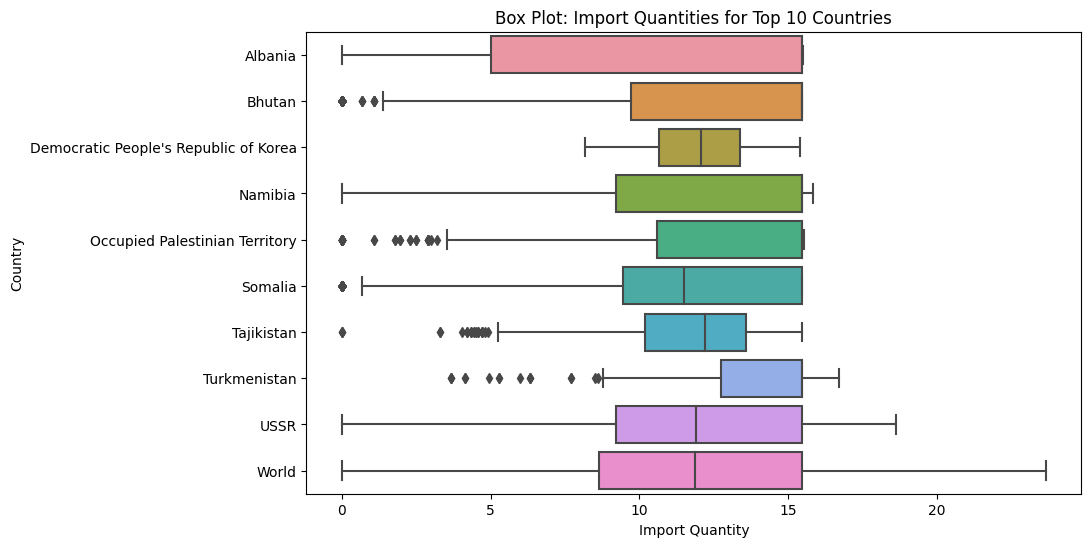

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load your dataset
# df = ...

# Select relevant columns for the analysis
relevant_columns = ['Area', 'Value']  # Adjust columns as needed
data = df[relevant_columns]

# Calculate the mean and standard deviation of import quantities for each country
country_stats = data.groupby('Area')['Value'].agg(['mean', 'std'])

# Get the top 10 countries based on mean import quantity
top_countries = country_stats.nlargest(10, 'mean').index

# Filter the data for the top 10 countries
top_data = data[data['Area'].isin(top_countries)]

# Perform ANOVA to compare means of import quantities among top countries
groups = [group['Value'] for name, group in top_data.groupby('Area')]
f_statistic, p_value = f_oneway(*groups)

print("ANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(top_data['Value'], top_data['Area'])
print("\nTukey's HSD Post-Hoc Test:")
print(tukey_results)

# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='Value', y='Area', data=top_data)
plt.title("Box Plot: Import Quantities for Top 10 Countries")
plt.xlabel("Import Quantity")
plt.ylabel("Country")
plt.show()


**Test 2:** if the Value data entries are associated with specific quality issues, e.g. Year.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency


# Let's assume 'Year' and 'Value' are relevant columns in your dataset
# and you want to test if flagged data entries are associated with quality issues

# Create a contingency table
contingency_table = pd.crosstab(df['Year'], df['Value'])

# Perform the Chi-Square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

# Interpret the results
if p < 0.05:
    print("\nThere is a significant association between Year entries and Value issues.")
else:
    print("\nYear and Value issues are not significantly associated.")


Chi-Square Statistic: 6987782.082283973
P-value: 0.0
Degrees of Freedom: 6283472
Expected Frequencies:
[[8.17944627e+01 2.98016496e+03 6.20231806e+01 ... 1.71476861e-02
  1.71476861e-02 1.71476861e-02]
 [8.17944627e+01 2.98016496e+03 6.20231806e+01 ... 1.71476861e-02
  1.71476861e-02 1.71476861e-02]
 [8.17944627e+01 2.98016496e+03 6.20231806e+01 ... 1.71476861e-02
  1.71476861e-02 1.71476861e-02]
 ...
 [1.08718850e+02 3.96114965e+03 8.24394298e+01 ... 2.27922117e-02
  2.27922117e-02 2.27922117e-02]
 [1.15840843e+02 4.22063804e+03 8.78399012e+01 ... 2.42852920e-02
  2.42852920e-02 2.42852920e-02]
 [1.18877632e+02 4.33128284e+03 9.01426403e+01 ... 2.49219354e-02
  2.49219354e-02 2.49219354e-02]]

There is a significant association between Year entries and Value issues.


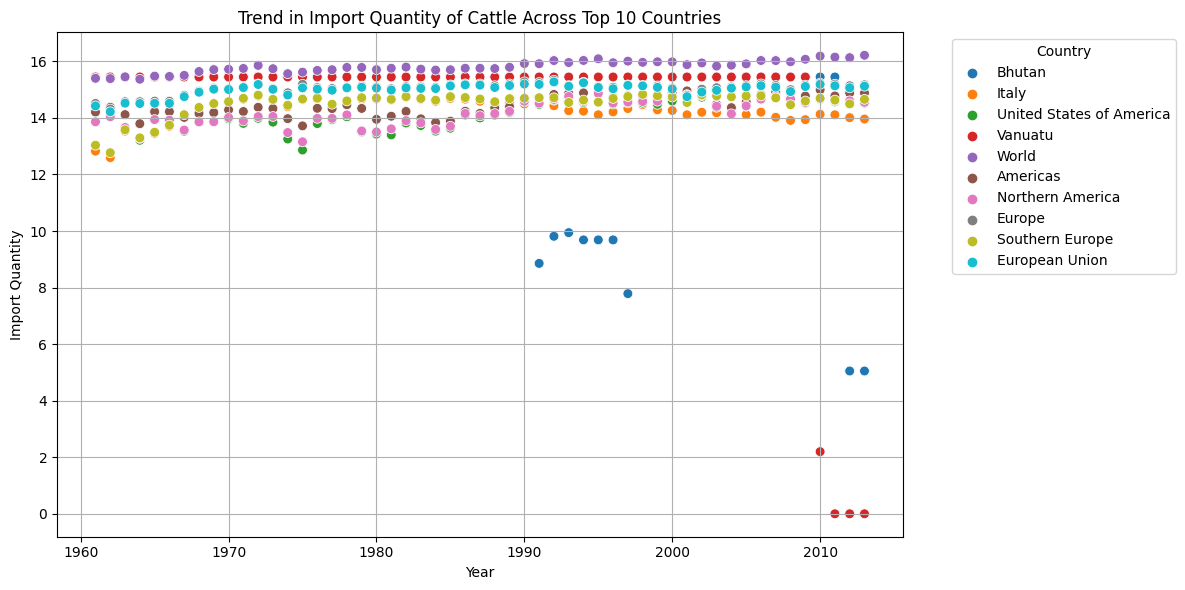

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the dataset for 'Cattle' and 'Import Quantity'
cattle_import = df[(df['Item'] == 'Cattle') & (df['Element'] == 'Import Quantity')]

# Get the top 10 countries based on import quantity of cattle
top_countries = cattle_import.groupby('Area')['Value'].sum().nlargest(10).index

# Filter the dataset for the top 10 countries
top_countries_import = cattle_import[cattle_import['Area'].isin(top_countries)]

# Create a scatter plot to show the trend in import quantity of cattle across the top 10 countries over the years
plt.figure(figsize=(12, 6))
sns.scatterplot(data=top_countries_import, x='Year', y='Value', hue='Area', s=50)
plt.title("Trend in Import Quantity of Cattle Across Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Import Quantity")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Result interpretation:** Both the p-value and effect size provide strong evidence against the null hypothesis and suggest a meaningful relationship between variables, the findings are considered to be highly significant and practically relevant.

Test 3: correlation between Value and Year

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

# Let's assume 'Year', 'CattleImports', and 'TradePolicyIndex' are relevant columns
# and you want to test the correlation between cattle imports and trade policy changes

# Extract relevant columns for analysis
cattle_imports = df1['Value']
trade_policy_index = df1['Year']

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(cattle_imports, trade_policy_index)

# Print the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("\nThere is a significant correlation between cattle imports and trade policy changes.")
else:
    print("\nThere is no significant correlation between cattle imports and trade policy changes.")


Pearson Correlation Coefficient: 0.03304159248871559
P-value: 2.16358340916692e-127

There is a significant correlation between cattle imports and trade policy changes.


Test 4: testing the hypothesis "there is a significant difference in variations among regions for a given year" is the Kruskal-Wallis test.

In [ ]:
from scipy.stats import kruskal


# Let's assume 'Year', 'Value', and 'Area' are relevant columns

# Get unique years in the dataset
unique_years = df['Year'].unique()

# Perform Kruskal-Wallis tests for each year
for year in unique_years:
    df_year = df[df['Year'] == year]
    groups = [group['Value'] for name, group in df_year.groupby('Area')]
    if len(groups) > 1:
        statistic, p_value = kruskal(*groups)
        print(f"Kruskal-Wallis Test for Year {year}:")
        print(f"Test Statistic: {statistic}")
        print(f"P-value: {p_value}")
        if p_value < 0.05:
            print("There is a significant difference in variations among regions for the given year.")
        else:
            print("There is no significant difference in variations among regions for the given year.")
    else:
        print(f"Not enough data for Year {year} to perform Kruskal-Wallis test.")


Kruskal-Wallis Test for Year 2000:
Test Statistic: 1800.3397062250554
P-value: 6.558308101309018e-236
There is a significant difference in variations among regions for the given year.
Kruskal-Wallis Test for Year 2001:
Test Statistic: 1814.6758369495221
P-value: 1.307875219874042e-238
There is a significant difference in variations among regions for the given year.
Kruskal-Wallis Test for Year 2002:
Test Statistic: 1683.989839376726
P-value: 4.024120361550797e-214
There is a significant difference in variations among regions for the given year.
Kruskal-Wallis Test for Year 2003:
Test Statistic: 1729.0399550406848
P-value: 1.5709392906961157e-222
There is a significant difference in variations among regions for the given year.
Kruskal-Wallis Test for Year 2004:
Test Statistic: 1669.399633490913
P-value: 2.0894156162821563e-211
There is a significant difference in variations among regions for the given year.
Kruskal-Wallis Test for Year 2005:
Test Statistic: 1601.7083971910429
P-value: 7

**Result Interpretation:** The results of the Kruskal-Wallis tests for all the years indicate a consistent and significant difference in variations among regions for each respective year. This can be an important finding in understanding the patterns and differences in the variable you're studying across different regions over time.

Test 5: test for significant shifts in cattle import sources among countries, you might consider using a Chi-Square test for independence or multinomial logistic regression, depending on the nature of your data and the factors influencing the shifts.

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Let's assume 'Year', 'Area', and 'Import_Source' are relevant columns
# and you want to test for significant shifts in cattle import sources among countries

# Create a contingency table
contingency_table = pd.crosstab(df['Area'], df['Value'])

# Perform the Chi-Square test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Test for Independence:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("There is a significant shift in cattle import sources among countries.")
else:
    print("There is no significant shift in cattle import sources among countries.")


Chi-Square Test for Independence:
Chi-Square Statistic: 31254285.336276066
P-value: 0.0
Degrees of Freedom: 30329836
There is a significant shift in cattle import sources among countries.


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from math import sqrt

# Assuming df contains your dataset
# Replace "CattleImportSources" and "Country" with your actual column names
contingency_table = pd.crosstab(df["Area"], df["Value"])

# Perform the Chi-Square test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate the effect size (Cramer's V)
N = np.sum(contingency_table.values)  # Calculate the total count from the contingency table
k = contingency_table.shape[1]
r = contingency_table.shape[0]
effect_size = sqrt(chi2 / (N * min(k-1, r-1)))

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Effect Size (Cramer's V): {effect_size}")


Chi-Square Statistic: 31257361.973058697
P-value: 0.0
Degrees of Freedom: 30330087
Effect Size (Cramer's V): 0.48575555207393595


**Result Interpretation:** Based on both the very low p-value and the moderate-to-strong effect size, you can confidently conclude that there is a significant and meaningful association between cattle import sources and countries in your dataset. The observed shifts in cattle import sources among countries are unlikely to be explained by random chance alone.